In [1]:
from src.databases.trajectory_analysis_script import *
from scipy.interpolate import griddata
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.stats import gaussian_kde
import pandas as pd
import os
import numpy as np
from src.helpers.plotting_functions import *
from src.helpers.import_functions import *
from src.helpers.Analysis_functions import *
from src.helpers.diff_mw import *
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib as mpl
from src.helpers.scalebars import *
from src.helpers.Convert_csv_mat import *
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy import stats, ndimage
import csv  
from sklearn.cluster import OPTICS
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  
from sklearn.cluster import DBSCAN
from cgitb import small
import src.helpers.smallestenclosingcircle as smallestenclosingcircle
import math
import src.helpers.guassian_fit as gaussian_fit
import src.helpers.fbm_utility as fbm_utility
import src.helpers.simulate_foci as simulate_foci
import src.helpers.simulate_cells as simulate_cells

import matplotlib.patches as mpatches
import pickle

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_9710/2452328035.py:34: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
globals = {"olympus_pixel_size":130,"confocal_pixel_size":79}

Following is a collection of rpoc_EZ conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190527/rpoc_ez, t_string = rpoc_ez
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA, t_string = RPOC (Bad data)
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Other_RPOC, t_string = rpoc (2018,08,13)
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Files_RPOC, t_string = RPOC (2018,08,21)
5. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/RPOC_new, t_string = RPOC (2018,10,03)
6. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20190620, t_string = rpoc_ez (2019,06,20)

In [4]:
#create a dictionary from the markdown code above 
dict_rp_ez = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190527/rpoc_ez",
        "t_string": "rpoc_ez"
    },
    # 2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA",
    #     "t_string": "RPOC"
    # },
    2:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Other_RPOC",
        "t_string": "rpoc"
    },
    # 4:{
    #     "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Files_RPOC",
    #     "t_string": "RPOC"
    # },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/RPOC_new",
        "t_string": "RPOC"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20190620",
        "t_string": "rpoc_ez"
    }
}


Following is a collection of rpoc_m9 conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190524/rpoc_m9, t_string = rpoc_M9
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/12/rpoc_m9, t_string = rpoc_ez
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/12/rpoc_m9_2, t_tring = rpoc_ez

In [5]:
dict_rp_m9 = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190524/rpoc_m9",
        "t_string": "rpoc_M9"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/12/rpoc_m9",
        "t_string": "rpoc_ez"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/12/rpoc_m9_2",
        "t_string": "rpoc_ez"
    }
}

Following is a collection of rpoc_hex5 conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/rpoc_ez_hex_5, t_string = rpoc_ez_hex_5
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/rpoc_ez_hex_5_2, t_string = rpoc_ez_h_5
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20200210/rpoc_ez_hex5, t_string = rpoc_ez_hex5
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/rp_ez_hex5, t_string = rp_ez_hex5
5. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/rp_ez_hex5_2, t_string = rp_ez_hex5
6. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/rp_ez_hex5, t_string = nusa_ez_hex5
7. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/rp_ez_hex5_2, t_string = rp_ez_hex5

In [6]:
dict_rp_hex5 = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/rpoc_ez_hex_5",
        "t_string": "rpoc_ez_hex_5"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/rpoc_ez_hex_5_2",
        "t_string": "rpoc_ez_h_5"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20200210/rpoc_ez_hex5",
        "t_string": "rpoc_ez_hex5"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/rp_ez_hex5",
        "t_string": "rp_ez_hex5"
    },
    5:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/rp_ez_hex5_2",
        "t_string": "rp_ez_hex5"
    },
    6:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/rp_ez_hex5",
        "t_string": "nusa_ez_hex5"
    },
    7:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/rp_ez_hex5_2",
        "t_string": "rp_ez_hex5"
    }
}

Following is a collection of ll_EZ conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/LACO_LACI, t_string = TB54_FAST
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190527/ll_ez, t_string = laco_laci_ez
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/17/ll_ez, t_string = ll_ez
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/17/ll_ez_2, t_string = ll_ez_2

In [7]:
dict_ll_ez = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/LACO_LACI",
        "t_string": "TB54_FAST"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190527/ll_ez",
        "t_string": "laco_laci_ez"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/17/ll_ez",
        "t_string": "ll_ez"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/17/ll_ez_2",
        "t_string": "ll_ez_2"
    }
}

Following is a collection of ll_m9 conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_m9, t_string = ll_m9
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190527/ll_m9, t_string = laco_laci_m9
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190524/laco_laci_M9, t_string = laco_laci_M9
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/ll_m9, t_string = ll_m9
5. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/ll_m9_2, t_string = ll_m9
6. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/ll_m9_3, t_string = ll_m9

In [8]:
dict_ll_m9 = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_m9",
        "t_string": "ll_m9"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190527/ll_m9",
        "t_string": "laco_laci_m9"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/new_days/20190524/laco_laci_M9",
        "t_string": "laco_laci_M9"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/ll_m9",
        "t_string": "ll_m9"
    },
    5:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/ll_m9_2",
        "t_string": "ll_m9"
    },
    6:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/ll_m9_3",
        "t_string": "ll_m9"
    }
}

Following is a collection of ll_hex5 conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/17/ll_hex5, t_string = ll_hex5
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_hex5, t_string = ll_ez_hex5
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_hex5_2, t_string = ll_hex5
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_hex5_3, t_string = ll_ez_hex5

In [9]:
dict_ll_hex5 = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/17/ll_hex5",
        "t_string": "ll_hex5"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_hex5",
        "t_string": "ll_ez_hex5"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_hex5_2",
        "t_string": "ll_hex5"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/ll_hex5_3",
        "t_string": "ll_ez_hex5"
    }
}

Following is a collection of nusa_EZ conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/newer_NUSA, t_string = NUSA
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Nusa_20190304, t_string = NUSA
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Nusa_20190305, t_string = NUSA

In [10]:
dict_nusa_ez = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/newer_NUSA",
        "t_string": "NUSA"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Nusa_20190304",
        "t_string": "NUSA"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Nusa_20190305",
        "t_string": "NUSA"
    }
}

Following is a collection of nusa_m9 conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20191216/nusa_m9, t_string = nusa_m9
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20191218/nusa_m9, t_string = nusa_m9
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20200212/nusa_m9_2, t_string = nusa_m9
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/12/nusa_m9, t_string = nusa_m9

In [11]:
dict_nusa_m9 = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20191216/nusa_m9",
        "t_string": "nusa_m9"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20191218/nusa_m9",
        "t_string": "nusa_m9"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/20200212/nusa_m9_2",
        "t_string": "nusa_m9"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/12/nusa_m9",
        "t_string": "nusa_m9"
    }
}

Following is a collection of nusa_hex5 conditions:
1. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/nusa_ez_hex_5, t_string = nusa_ez_hex_5
2. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/nusa_ez_hex5, t_string = nusa_ez_hex5
3. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/nusa_ez_hex5_2, t_string = nusa_ez_hex5
4. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/nusa_ez_hex5_3, t_string = nusa_ez_hex5
5. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/nusa_ez_hex5, t_string = nusa_ez_hex5
6. path = /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/nusa_ez_hex5_2, t_string = nusa_ez_hex5

In [12]:
dict_nusa_hex5 = {
    1:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/nusa_ez_hex_5",
        "t_string": "nusa_ez_hex_5"
    },
    2:{ "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/nusa_ez_hex5",
        "t_string": "nusa_ez_hex5"
    },
    3:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/nusa_ez_hex5_2",
        "t_string": "nusa_ez_hex5"
    },
    4:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/15/nusa_ez_hex5_3",
        "t_string": "nusa_ez_hex5"
    },
    5:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/nusa_ez_hex5",
        "t_string": "nusa_ez_hex5"
    },
    6:{
        "Path": "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/16/nusa_ez_hex5_2",
        "t_string": "nusa_ez_hex5"
    }
}

Lets define some of the parameters for drop mappings

In [13]:
dict_read_param = {
    "minimum_percent_per_drop_in": .5, 
    "t_len_u": 100, 
    "t_len_l": 5, 
    "minimum_tracks_per_drop": 3
}
dict_blob_param = {
    "threshold": 1e-4,
    "overlap": 0,
    "detection_name": 'bp',
    "min_sigma": 1/np.sqrt(2),
    "max_sigma": 3/np.sqrt(2),
    "num_sigma": 100,
    "median": False
}

dict_fitting_params = {
    "mask_size": 3,
    "plot_fit": False,
    "fitting_image": "Original",
    "radius_func": np.mean,#identity,
    "residual_func": residuals_gaus2d,
    "sigma_range": 0.2,
    "centroid_range": 0.2,
    "height_range": 2
}

type_of_blob = "TRACKMATE"

Define a helper functions to do the mapping

In [14]:
def read_data(wd,t_string,dict_read_param,dict_blob_param,dict_fit_param,type_of_blob):
    data = run_analysis(wd=wd, t_string=t_string)
    data.read_parameters(**dict_read_param)
    data.get_blob_parameters(**dict_blob_param)
    data.get_fitting_parameters(kwargs=dict_fit_param)
    data.type_of_blob = type_of_blob
    data.run_flow()
    return data

#lets make another one to batch for each dict condition
def batch_read_data(dict_condition,dict_read_param,dict_blob_param,dict_fit_param,type_of_blob):
    dict_data = {}
    for key in dict_condition:
        wd = dict_condition[key]["Path"]
        t_string = dict_condition[key]["t_string"]
        dict_data[key] = read_data(wd=wd,t_string=t_string,dict_read_param=dict_read_param,dict_blob_param=dict_blob_param,dict_fit_param=dict_fit_param,type_of_blob=type_of_blob)
    return dict_data


Define a helper function to aid with MSD and other parameters

In [15]:
def msd_calc(track_dic,h=None,tau_lim=None,tick_space=2,save=False,cd=None,data_type=None,plot=True,msd_fit_lim=3):
    '''Docstring for msd_calc, this is just a fancy wrapper for the MSD_Tracks function in the Analysis_functions module that also does some plotting
    Not very useful for anything other than plotting the MSD curves for a set of tracks.
    MSD calculations can be done using this but it is obtuse and not recommended. See MSD_Tracks for a better way to do this.

    Parameters:
    -----------
    track_dic: dictionary
        dictionary of tracks with the keys being the track number and the values being the track
    h: float
        True husrt value for the simulation, if None this does not get plotted
    tau_lim: int
        The maximum tau value to plot, if None then this is set to the maximum tau value. Only used if plot is True
    tick_space: int
        Total ticks for colorbar in Van hove Correlation Plot, only used if plot is True
    save: bool
        If True then the plot is saved to the specified directory
    cd: str
        The directory to save the plot to, only used if save is True
    data_type: str
        The type of data that is being plotted, only used if save is True. This is the name of the folder that the plot is saved to
    plot: bool
        If True then the plot is plotted
    msd_fit_lim: int, array-like of length 2, or None, optional
        The number of points to fit the line to for the alpha value
        if array then the first value is the lower limit and the second value is the upper limit to fit for tau
    

    Returns:
    --------
    Dict containing:
    fit_ens: array
        The fit parameters for the ensemble of tracks
    track_alpha: dict
        The alpha values for each track
    tavg_t1_msd: dict
        The time averaged msd for tau = 1
    track_msds: dict
        The msd curves for each track
    track_alpha_linear_fit: dict
        The linear fit parameters for each track
    track_diffusion: dict
        The diffusion coefficient for each track using a polynomial fit
    track_diffusion_linear_fit: dict
        The diffusion coefficient for each track using a linear fit
    
    

    '''
    #if save is True and cd is None then raise an error
    if save:
        if cd is None:
            raise ValueError("cd must be specified if save is True")
        if data_type is None:
            raise ValueError("data_type must be specified if save is True")

    msd_dict,ens_displacements = MSD_Tracks(track_dic,permutation=True,return_type="both",verbose=True)
    msd = msd_dict["msd_curves"]
    disp_per_track = msd_dict["displacements"]
    #update the disp_per_track dictionary to have the msd curve per track
    track_msds = {}
    for i,j in disp_per_track.items():
        track_msds[i] = msd_avgerage_utility(j)
    #fit a line to the msd curves for the first n of the points and find the r2 value
    try:
        if isinstance(msd_fit_lim,int):
            fit_ens = np.polyfit(np.log(list(msd.keys())[:msd_fit_lim]),np.log(list(msd.values())[:msd_fit_lim]),1,cov=True)
        elif isinstance(msd_fit_lim,list|tuple|np.ndarray):
            fit_ens = np.polyfit(np.log(list(msd.keys())[msd_fit_lim[0]:msd_fit_lim[1]]),np.log(list(msd.values())[msd_fit_lim[0]:msd_fit_lim[1]]),1,cov=True)
        slope_error = np.sqrt(fit_ens[1])

    except:
        fit_ens = None
        slope_error = None

    track_alphas = {}
    track_alphas_linear_fit = {}
    tavg_t1_msds = {}
    track_diffusion = {}
    track_diffusion_linear_fit = {}
    # for each track plot the msd_curve 
    for i,j in track_msds.items():
        #make sure the length of the track is greater than 3 so that the fit can be done
        if len(j.keys())<3:
            continue
        #set the alpha to be 0.1 so that the lines are transparent
        #if plot:
        #    plt.plot(j.keys(),j.values(),alpha=0.1)
        #fit a line to the msd curves for the first 3 of the points and find the r2 value
        if isinstance(msd_fit_lim,int):
            #fit,pcov = curve_fit(fit_MSD_Linear,np.log(list(j.keys())[:msd_fit_lim]),np.log(list(j.values())[:msd_fit_lim]),p0=[1,1])
            #repeat this with fitting the msd to a the function fit_MSD from Analysis_functions using curve_fit
            fit_curve,pcov = curve_fit(fit_MSD,list(j.keys())[:msd_fit_lim],list(j.values())[:msd_fit_lim],p0=[1,1,0],maxfev=1000000)
        elif isinstance(msd_fit_lim,list|tuple|np.ndarray):
            #fit,pcov = curve_fit(fit_MSD_Linear,np.log(list(j.keys())[msd_fit_lim[0]:msd_fit_lim[1]]),np.log(list(j.values())[msd_fit_lim[0]:msd_fit_lim[1]]),p0=[1,1])
            #repeat this with fitting the msd to a the function fit_MSD from Analysis_functions using curve_fit
            fit_curve,pcov = curve_fit(fit_MSD,list(j.keys())[msd_fit_lim[0]:msd_fit_lim[1]],list(j.values())[msd_fit_lim[0]:msd_fit_lim[1]],p0=[1,1,0],maxfev=1000000)
        #plot the fitted line
        #if plot and fit_curve[1]<0:
        #     plt.plot(list(j.keys())[:msd_fit_lim],fit_MSD(list(j.keys())[:msd_fit_lim],fit_curve[0],fit_curve[1]),alpha=0.1)
        #     plt.plot(j.keys(),j.values(),alpha=0.1)
        # plt.show()
        if plot:
            plt.plot(list(j.keys()),np.array(list(j.values())),alpha=0.1)
        #add the slope of the fitted line to the track_alphas dictionary
        #track_alphas_linear_fit[i] = fit[1]
        track_alphas[i] = fit_curve[1]
        #add the msd at tau=1 to the tavg_t1_msds dictionary, divide by 4 to get the correct value t is by default 1 since its tau=1
        tavg_t1_msds[i] = j[1]
        track_diffusion[i] = fit_curve[0]/1.
        #track_diffusion_linear_fit[i] = np.exp(fit[0])/1.
        
    if plot:
        #plot the msd curves and the fitted line
        plt.plot(list(msd.keys()),np.array(list(msd.values())),label="MSD_ensemble",linewidth=3,alpha=1,zorder=1)
        if fit_ens != None:
            plt.plot(list(msd.keys()),np.exp(fit_ens[0][1])*(np.array(list(msd.keys())))**fit_ens[0][0],label="fit_ensemble",linewidth=3,alpha=1,zorder=2)

        plt.xscale("log")
        plt.yscale("log")
        #label the plot
        plt.xlabel("lag time (au)")
        plt.ylabel("MSD (au)")
        plt.legend()
        #annotate the plot with the slope of the fitted line with 2 decimal places (label the slope as alpha in greek)
        #add the error in the slope as well
        plt.annotate(r"$\alpha$ = {:.2f} $\pm$ {:.2f}".format(fit_ens[0][0],slope_error[0][0]),xy=(0.05,0.7),xycoords="axes fraction",fontweight="bold",fontsize=16)
        #annotate the true alpha value (hurst*2)
        if h != None:
            plt.annotate(r"True $\alpha$ = {:.2f}".format(h*2),xy=(0.05,0.6),xycoords="axes fraction",fontweight="bold",fontsize=16)
        if save == True:
            plt.savefig(cd+"/{0}_MSD_plot.png".format(data_type))
        plt.show()

        #on a new figure plot the histogram of the slopes of the fitted lines
        plt.clf()
        plt.hist(list(track_alphas.values()),bins=10)
        #plot a vertical line at the mean of the track_alphas
        plt.axvline(np.mean(list(track_alphas.values())),color="red",label="mean")
        #annotate the plot with the mean of the track_alphas
        plt.annotate(r"$\alpha$ = {:.2f}".format(np.mean(list(track_alphas.values()))),xy=(0.05,0.7),xycoords="axes fraction",fontweight="bold",fontsize=16)
        plt.xlabel(r"$\alpha$")
        plt.ylabel("count")
        if save == True:
            plt.savefig(cd+"/{0}_alpha_hist.png".format(data_type))
        plt.show()

        #repeat the above for the track_alphas_linear_fit
        plt.clf()
        plt.hist(list(track_alphas_linear_fit.values()),bins=10)
        plt.axvline(np.mean(list(track_alphas_linear_fit.values())),color="red",label="mean")
        plt.annotate(r"$\alpha$ = {:.2f}".format(np.mean(list(track_alphas_linear_fit.values()))),xy=(0.05,0.7),xycoords="axes fraction",fontweight="bold",fontsize=16)
        plt.xlabel(r"$\alpha$")
        plt.ylabel("count")
        if save == True:
            plt.savefig(cd+"/{0}_alpha_hist_linear_fit.png".format(data_type))
        plt.show()

    #the following plots the pdf of the displacements for each tau, right now it sometimes creates infinite loops so it is commented out TODO: fix this
    if plot:
        #make a figure and axes 2 subplots
        fig,ax = plt.subplots(1,2,figsize=(20,10))

        #get a collection of N different colours where N is the number of taus
        colors = plt.cm.jet(np.linspace(0,1,len(ens_displacements.keys())))

    #make a df to store the tau value and the fitted gmm mean for that tau
    gmm_tau_df = pd.DataFrame(columns=["tau","mean"])
    #make a histogram of the displacements for each tau from ens_displacements
    for i,j in ens_displacements.items():
        #if the tau is greater than the tau_lim then skip it
        if (tau_lim != None):
            if i > tau_lim:
                continue
        if plot:
            #make the histogram normalized and transparent for the first subplot
            #ax[0].hist(np.ndarray.flatten(np.array(j)),bins=50,alpha=0.1,color=colors[i-1],density=True)#,stacked=True,weights=np.ones(len(np.ndarray.flatten(np.array(j))))/len(np.ndarray.flatten(np.array(j))))
            #make the histogram normalized and transparent for the second subplot for abs displacements
            #ax[1].hist(np.abs(np.ndarray.flatten(np.array(j))),bins=50,alpha=0.1,color=colors[i-1],density=True)#,stacked=True,weights=np.ones(len(np.ndarray.flatten(np.array(j))))/len(np.ndarray.flatten(np.array(j))))
            pass
        #fit a gaussian to the histogram
        mu,sigma = norm.fit(np.ndarray.flatten(np.array(j)))
        #fit it for the abs displacements as well
        mu_abs,sigma_abs = norm.fit(np.abs(np.ndarray.flatten(np.array(j))))
        #store the tau and the mean of the gaussian in the df
        gmm_tau_df = gmm_tau_df.append({"tau":i,"mean":mu_abs},ignore_index=True)
        if plot:
            #plot the gaussian
            x = np.linspace(np.min(np.ndarray.flatten(np.array(j))),np.max(np.ndarray.flatten(np.array(j))),100)
            x_abs = np.linspace(np.min(np.abs(np.ndarray.flatten(np.array(j)))),np.max(np.abs(np.ndarray.flatten(np.array(j)))),100)
            ax[0].plot(x,norm.pdf(x,mu,sigma),linewidth=1,color=colors[i-1])
            ax[1].plot(x_abs,norm.pdf(x_abs,mu_abs,sigma_abs),linewidth=1,color=colors[i-1])

    if plot:
        #label the plot, in greek the delta_x is P_delta_x
        ax[0].set_xlabel(r"$\Delta r$ (au)")
        ax[0].set_ylabel(r"$P_{\Delta r}$ ($au^{-1}$)")
        ax[1].set_xlabel(r"$|\Delta r|$ (au)")
        ax[1].set_ylabel(r"$P_{|\Delta r|}$ ($au^{-1}$)")


        v1 = np.linspace(np.min(np.array(list(ens_displacements.keys()),dtype=int)), np.max(np.array(list(ens_displacements.keys()),dtype=int)), tick_space, endpoint=True)
        #rather than a legend, make a colorbar with the colors corresponding to the taus
        cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.jet),ticks=v1,ax=ax[0])
        cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in v1])

        cbar.set_label("tau (au)")


        #make the title
        ax[0].set_title("PDF of displacements for each tau (van Hove correlation)")
        ax[0].set_ylim(0,1.5)
        if save == True:
            plt.savefig(cd+"/{0}_PDF_plot.png".format(data_type))
        plt.show()
        #plot the mean of the gaussian for each tau
        plt.plot(gmm_tau_df["tau"],gmm_tau_df["mean"],marker="o")
        plt.xlabel("tau (au)")
        plt.ylabel("mean of gaussian fit (au)")
        plt.title("Mean of gaussian fit for each tau")
        plt.show()

    return {"fit_ens":fit_ens, 
            "track_alpha":track_alphas, 
            "tavg_t1_msd":tavg_t1_msds, 
            "track_msds":track_msds, 
            "track_alpha_linear_fit":track_alphas_linear_fit,
            "track_diffusion":track_diffusion,
            "track_diffusion_linear_fit":track_diffusion_linear_fit}

Lets make a function to go through the dict containing the batched mappings and find the collection of MSDs

In [16]:
def batch_MSD(dict_data,mapped="ALL",extracts="track_diffusion"):
    df_MSD = {}
    all_temp = []
    for key, data in dict_data.items():
        track_dict = data._convert_to_track_dict_bulk()
        MSD_params = msd_calc(track_dict[mapped],h=None,tau_lim=None,tick_space=10,msd_fit_lim=[0,4],plot=False)
        diff_coeff = np.array(list(MSD_params[extracts].values()))
        df_MSD[key] = diff_coeff
        all_temp+=list(diff_coeff)
    df_MSD["ALL"] = np.array(all_temp)
    return df_MSD

In [17]:
cd = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA"

In [18]:
#make a function to save the data as a pickle file for different conditions and paths
def pickle_data(data,cd,condition,path):
    #make the path if it doesn't exist
    if not os.path.exists(cd+"/"+path):
        os.makedirs(cd+"/"+path)
    #save the data as a pickle file
    with open(cd+"/"+path+"/"+condition+".pkl","wb") as f:
        pickle.dump(data,f)


In [19]:
#if the data is already saved as a pickle file, load it
def load_pickle_data(cd,condition,path):
    with open(cd+"/"+path+"/"+condition+".pkl","rb") as f:
        data = pickle.load(f)
    return data


In [20]:
#load all the data for TRACKMATE_BLOB
test_batch_rp_m9 = load_pickle_data(cd,"test_batch_rp_m9","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9")
test_batch_rp_ez = load_pickle_data(cd,"test_batch_rp_ez","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez")
test_batch_rp_hex5 = load_pickle_data(cd,"test_batch_rp_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5")
test_batch_ll_m9 = load_pickle_data(cd,"test_batch_ll_m9","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9")
test_batch_ll_ez = load_pickle_data(cd,"test_batch_ll_ez","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez")
test_batch_ll_hex5 = load_pickle_data(cd,"test_batch_ll_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5")
test_batch_nusa_hex5 = load_pickle_data(cd,"test_batch_nusa_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5")
test_batch_nusa_m9 = load_pickle_data(cd,"test_batch_nusa_m9","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9")
test_batch_nusa_ez = load_pickle_data(cd,"test_batch_nusa_ez","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez")



In [22]:
test_batch_MSD_rp_m9 = load_pickle_data(cd,"test_batch_MSD_rp_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/ALL_MSD")
test_batch_MSD_nusa_m9 = load_pickle_data(cd,"test_batch_MSD_nusa_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/ALL_MSD")
test_batch_MSD_ll_m9 = load_pickle_data(cd,"test_batch_MSD_ll_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/ALL_MSD")
test_batch_MSD_rp_ez = load_pickle_data(cd,"test_batch_MSD_rp_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/ALL_MSD")
test_batch_MSD_nusa_ez = load_pickle_data(cd,"test_batch_MSD_nusa_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/ALL_MSD")
test_batch_MSD_ll_ez = load_pickle_data(cd,"test_batch_MSD_ll_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/ALL_MSD")
test_batch_MSD_rp_hex5 = load_pickle_data(cd,"test_batch_MSD_rp_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/ALL_MSD")
test_batch_MSD_nusa_hex5 = load_pickle_data(cd,"test_batch_MSD_nusa_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/ALL_MSD")
test_batch_MSD_ll_hex5 = load_pickle_data(cd,"test_batch_MSD_ll_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/ALL_MSD")

Lets test this on RPOC

In [ ]:
test_batch_rp_m9 = batch_read_data(dict_rp_m9,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)


In [ ]:
#using the pickle_data function, save the data of condition test_batch_rp_m9, dict_rp_m9, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9"

pickle_data(test_batch_rp_m9,cd,"test_batch_rp_m9","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5")
pickle_data(dict_rp_m9,cd,"dict_rp_m9","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5")

In [22]:
test_batch_MSD_rp_m9 = batch_MSD(test_batch_rp_m9)

In [ ]:
test_batch_rp_ez = batch_read_data(dict_rp_ez,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_rp_ez, dict_rp_ez, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez"

pickle_data(test_batch_rp_ez,cd,"test_batch_rp_ez","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5")
pickle_data(dict_rp_ez,cd,"dict_rp_ez","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5")


In [23]:
test_batch_MSD_rp_ez = batch_MSD(test_batch_rp_ez)

In [ ]:
test_batch_rp_hex5 = batch_read_data(dict_rp_hex5,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_rp_hex5, dict_rp_hex5, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5"

pickle_data(test_batch_rp_hex5,cd,"test_batch_rp_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5")
pickle_data(dict_rp_hex5,cd,"dict_rp_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5")


In [24]:
test_batch_MSD_rp_hex5 = batch_MSD(test_batch_rp_hex5)

Plot RPOC data

1.0444946197603537
0.5748225684735417
0.6926893071872399


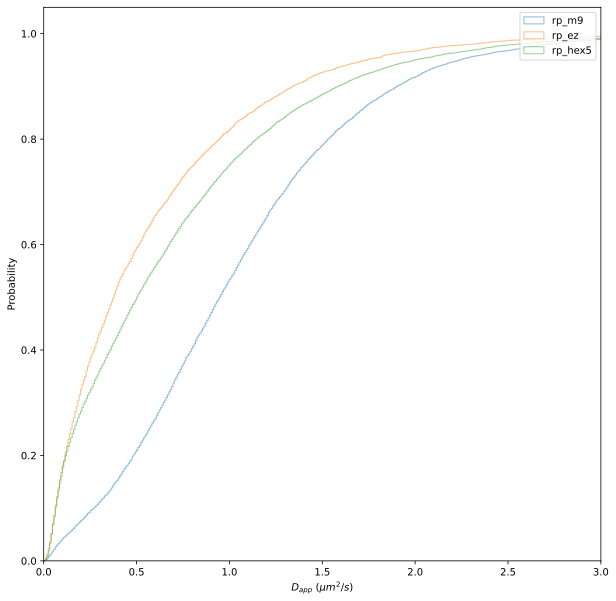

In [23]:
#plot the diffusion coefficients as a cumulative histogram
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_rp_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_rp_hex5["ALL"]/1.))),
    1000)
print(np.mean(con_pix_si(test_batch_MSD_rp_m9["ALL"]/1.,which="msd")))
print(np.mean(con_pix_si(test_batch_MSD_rp_ez["ALL"]/1.,which="msd")))
print(np.mean(con_pix_si(test_batch_MSD_rp_hex5["ALL"]/1.,which="msd")))
ax.hist(con_pix_si(test_batch_MSD_rp_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_rp_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_rp_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


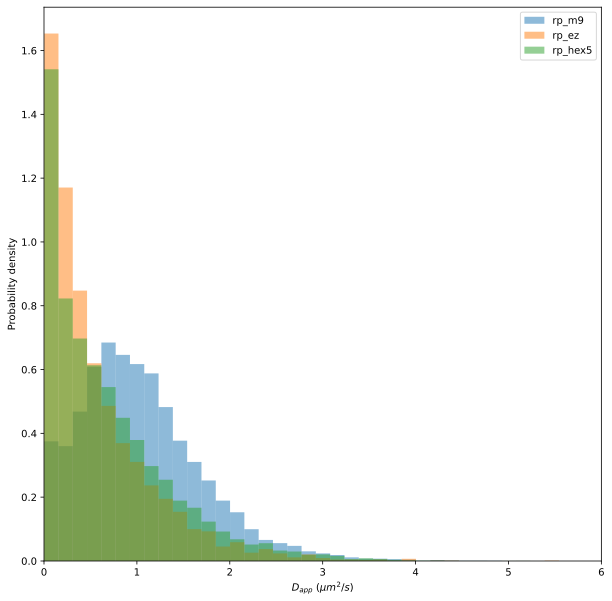

In [151]:
#plot the diffusion coefficients in normal histograms
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_rp_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_rp_hex5["ALL"]/1.))),
    50)
ax.hist(con_pix_si(test_batch_MSD_rp_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_rp_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True)
ax.hist(con_pix_si(test_batch_MSD_rp_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,6)
plt.show()


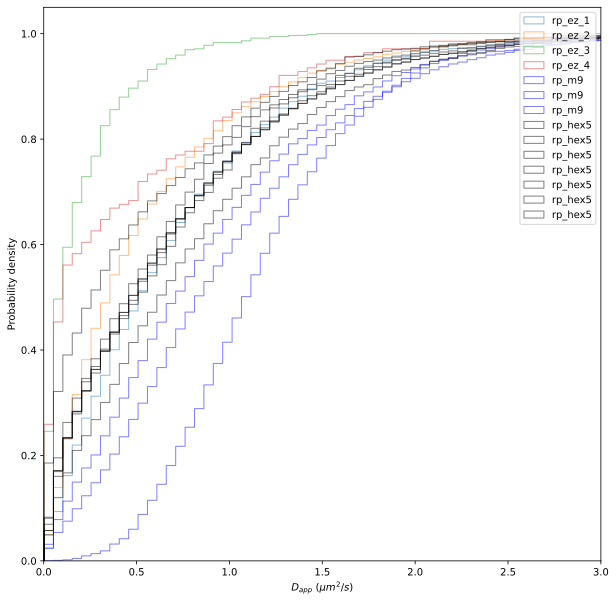

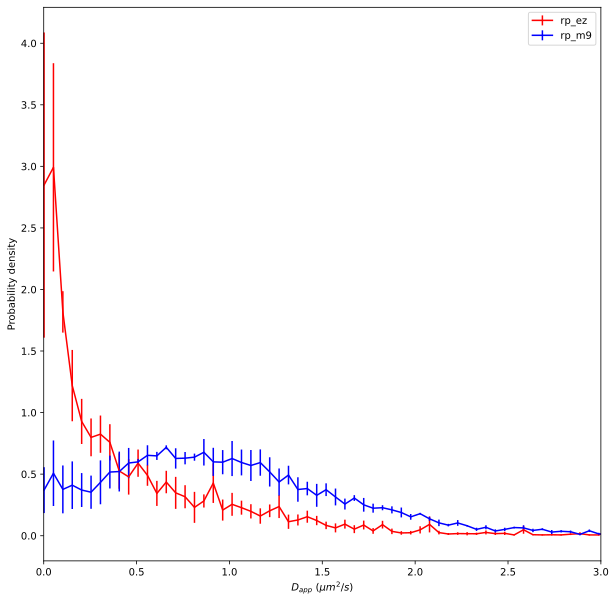

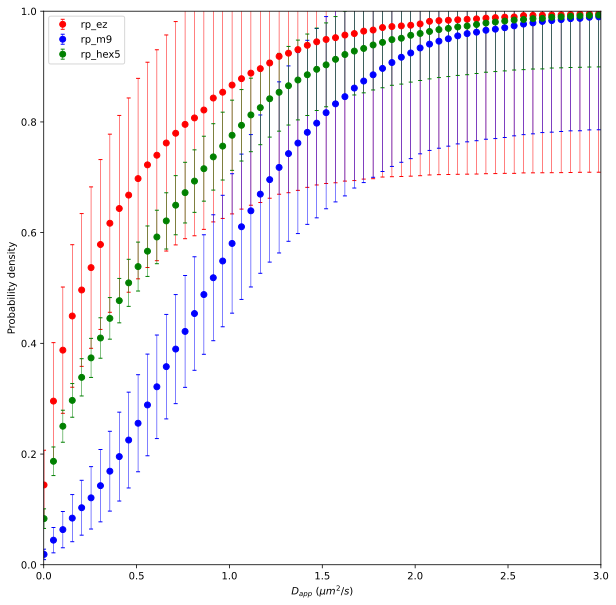

In [25]:
#test to see the differences in each sample
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_rp_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_rp_hex5["ALL"]/1.))),
    150)
#plot the ez data but for each element in the batch

n_ez = np.zeros((len(test_batch_MSD_rp_ez)-1,len(bins)-1))
n_m9 = np.zeros((len(test_batch_MSD_rp_m9)-1,len(bins)-1))
n_hex5 = np.zeros((len(test_batch_MSD_rp_hex5)-1,len(bins)-1))
for i,j in test_batch_MSD_rp_ez.items():
    if (i != "ALL"):
        ax.hist(con_pix_si(test_batch_MSD_rp_ez[i]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez_{0}".format(i),density=True,histtype="step",cumulative=True)
        n,_ = np.histogram(con_pix_si(test_batch_MSD_rp_ez[i]/1.,which="msd"),bins=bins,density=True)
        n_ez[int(i)-1,:] = n
for i,j in test_batch_MSD_rp_m9.items():
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_rp_m9[i]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True,histtype="step",cumulative=True,color='b')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_rp_m9[i]/1.,which="msd"),bins=bins,density=True)
        n_m9[int(i)-1,:] = n
for i,j in test_batch_MSD_rp_hex5.items():
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_rp_hex5[i]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True,histtype="step",cumulative=True,color='k')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_rp_hex5[i]/1.,which="msd"),bins=bins,density=True)
        n_hex5[int(i)-1,:] = n

#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#find the mean of all the n's
n_ez_mean = np.mean(n_ez,axis=0)
n_m9_mean = np.mean(n_m9,axis=0)
n_hex5_mean = np.mean(n_hex5,axis=0)
#find the standard error of all the n's
n_ez_std = np.std(n_ez,axis=0,ddof=1)/np.sqrt(len(n_ez))
n_m9_std = np.std(n_m9,axis=0,ddof=1)/np.sqrt(len(n_m9))
n_hex5_std = np.std(n_hex5,axis=0,ddof=1)/np.sqrt(len(n_hex5))


#plot the mean of all the n's and the standard error as error bars
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],n_ez_mean,yerr=n_ez_std,label="rp_ez",color='r')
ax.errorbar(bins[:-1],n_m9_mean,yerr=n_m9_std,label="rp_m9",color='b')
#ax.errorbar(bins[:-1],n_hex5_mean,yerr=n_hex5_std,label="rp_hex5",color='g')
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#repeat with the cumulative distribution
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],np.cumsum(n_ez_mean)/np.max(np.cumsum(n_ez_mean)),yerr=np.cumsum(n_ez_std)/np.max(np.cumsum(n_ez_mean)),label="rp_ez",color='r',fmt='o',elinewidth=0.5,capsize=2)
ax.errorbar(bins[:-1],np.cumsum(n_m9_mean)/np.max(np.cumsum(n_m9_mean)),yerr=np.cumsum(n_m9_std)/np.max(np.cumsum(n_m9_mean)),label="rp_m9",color='b',fmt='o',elinewidth=0.5,capsize=2)
ax.errorbar(bins[:-1],np.cumsum(n_hex5_mean)/np.max(np.cumsum(n_hex5_mean)),yerr=np.cumsum(n_hex5_std)/np.max(np.cumsum(n_hex5_mean)),label="rp_hex5",color='g',fmt='o',elinewidth=0.5,capsize=2)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_ylim(0,1)
plt.show()






Lets repeat with LL

In [ ]:
test_batch_ll_ez = batch_read_data(dict_ll_ez,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_ll_ez, dict_ll_ez, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez"

pickle_data(test_batch_ll_ez,cd,"test_batch_ll_ez","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5")
pickle_data(dict_ll_ez,cd,"dict_ll_ez","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5")


In [25]:
test_batch_MSD_ll_ez = batch_MSD(test_batch_ll_ez)

In [ ]:
test_batch_ll_m9 = batch_read_data(dict_ll_m9,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_ll_m9, dict_ll_m9, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9"

pickle_data(test_batch_ll_m9,cd,"test_batch_ll_m9","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5")
pickle_data(dict_ll_m9,cd,"dict_ll_m9","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5")


In [26]:
test_batch_MSD_ll_m9 = batch_MSD(test_batch_ll_m9)

In [ ]:
test_batch_ll_hex5 = batch_read_data(dict_ll_hex5,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_ll_hex5, dict_ll_hex5, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5"

pickle_data(test_batch_ll_hex5,cd,"test_batch_ll_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5")
pickle_data(dict_ll_hex5,cd,"dict_ll_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5")


In [27]:
test_batch_MSD_ll_hex5 = batch_MSD(test_batch_ll_hex5)

Plot the LL data

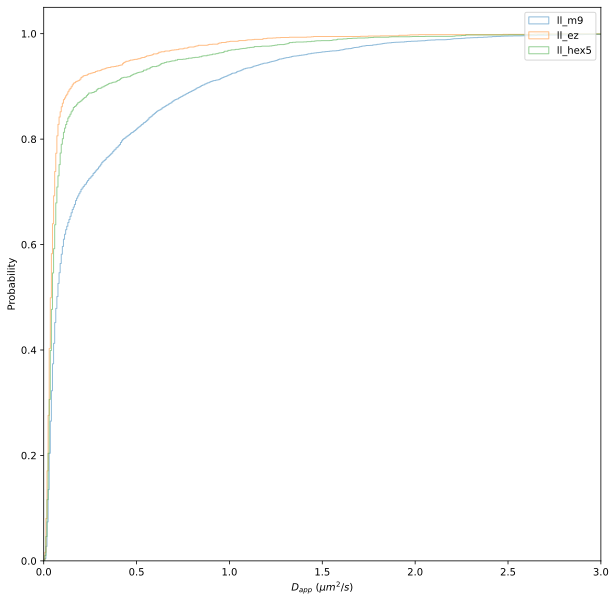

In [120]:
#plot the ll data
#plot the diffusion coefficients as a cumulative histogram
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_ll_m9["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_ll_m9["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_ll_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


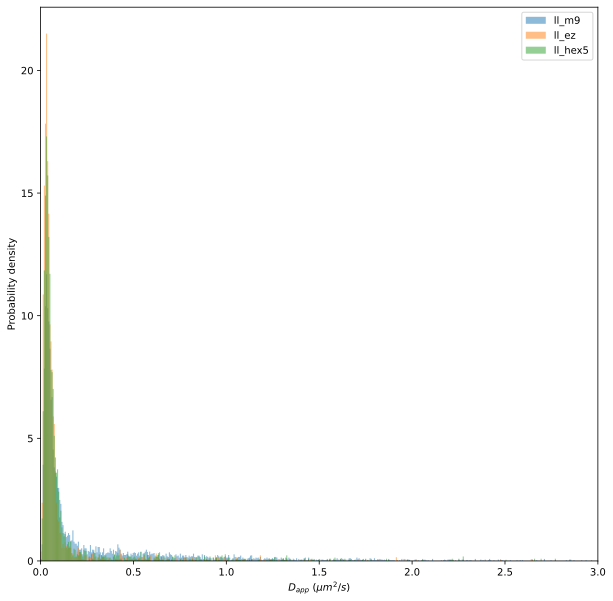

In [121]:
#plot the diffusion coefficients as normal histograms
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_ll_m9["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_ll_m9["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_ll_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


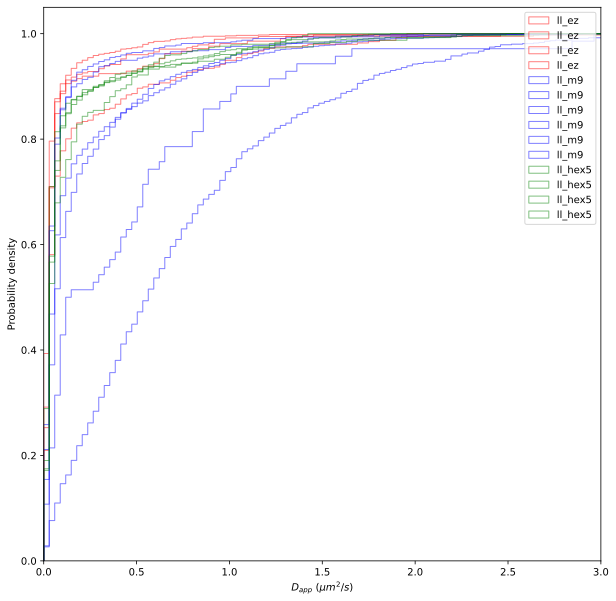

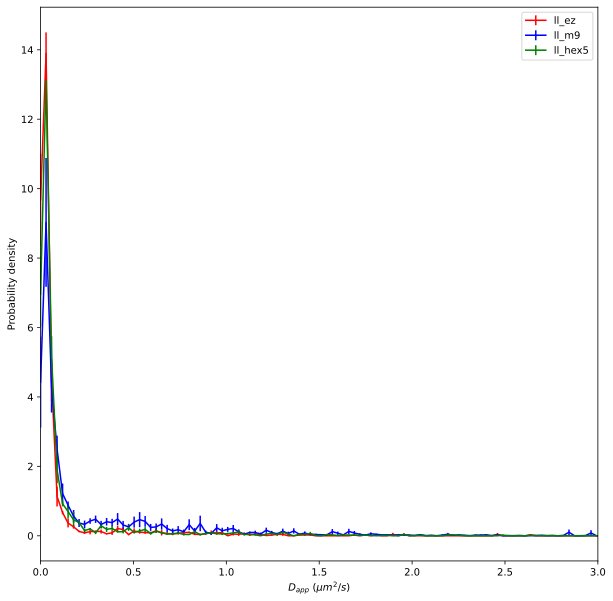

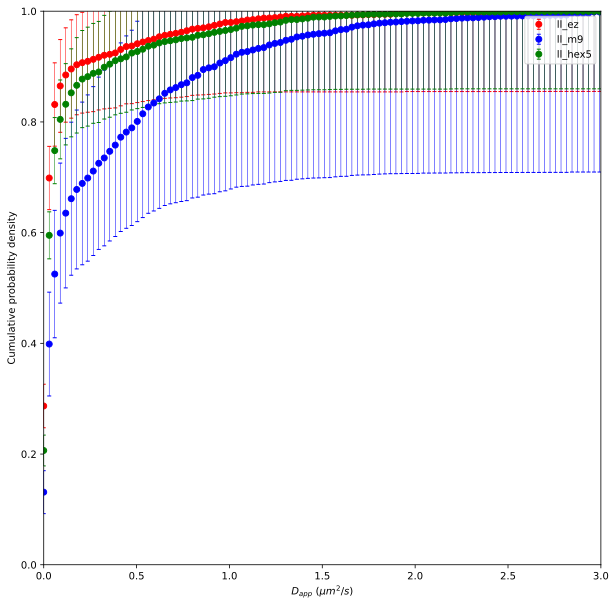

In [122]:
#test to see the differences in each sample
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_ll_m9["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_ll_m9["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    200)
n_ez_ll = np.zeros((len(test_batch_MSD_ll_ez.keys())-1,len(bins)-1))
n_m9_ll = np.zeros((len(test_batch_MSD_ll_m9.keys())-1,len(bins)-1))
n_hex5_ll = np.zeros((len(test_batch_MSD_ll_hex5.keys())-1,len(bins)-1))

#plot the ez data but for each element in the batch
for i,j in test_batch_MSD_ll_ez.items():
    #do not plot the "ALL"
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_ll_ez[i]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True,histtype="step",cumulative=True,color='r')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_ll_ez[i]/1.,which="msd"),bins=bins,density=True)
        n_ez_ll[int(i)-1,:] = n
for i,j in test_batch_MSD_ll_m9.items():
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_ll_m9[i]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True,histtype="step",cumulative=True,color='b')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_ll_m9[i]/1.,which="msd"),bins=bins,density=True)
        n_m9_ll[int(i)-1,:] = n
for i,j in test_batch_MSD_ll_hex5.items():
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_ll_hex5[i]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True,histtype="step",cumulative=True,color='g')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_ll_hex5[i]/1.,which="msd"),bins=bins,density=True)
        n_hex5_ll[int(i)-1,:] = n

#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#find the mean and standard error of the diffusion coefficients
mean_ez_ll = np.mean(n_ez_ll,axis=0)
std_ez_ll = np.std(n_ez_ll,axis=0,ddof=1)/np.sqrt(len(n_ez_ll))
mean_m9_ll = np.mean(n_m9_ll,axis=0)
std_m9_ll = np.std(n_m9_ll,axis=0,ddof=1)/np.sqrt(len(n_m9_ll))
mean_hex5_ll = np.mean(n_hex5_ll,axis=0)
std_hex5_ll = np.std(n_hex5_ll,axis=0,ddof=1)/np.sqrt(len(n_hex5_ll))

#plot the mean and standard error of the diffusion coefficients
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],mean_ez_ll,yerr=std_ez_ll,label="ll_ez",color='r')
ax.errorbar(bins[:-1],mean_m9_ll,yerr=std_m9_ll,label="ll_m9",color='b')
ax.errorbar(bins[:-1],mean_hex5_ll,yerr=std_hex5_ll,label="ll_hex5",color='g')
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#repeat with the cumulative distribution
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],np.cumsum(mean_ez_ll)/np.max(np.cumsum(mean_ez_ll)),yerr=np.cumsum(std_ez_ll)/np.max(np.cumsum(mean_ez_ll)),label="ll_ez",color='r',fmt='o',elinewidth=0.5,capsize=2)
ax.errorbar(bins[:-1],np.cumsum(mean_m9_ll)/np.max(np.cumsum(mean_m9_ll)),yerr=np.cumsum(std_m9_ll)/np.max(np.cumsum(mean_m9_ll)),label="ll_m9",color='b',fmt='o',elinewidth=0.5,capsize=2)
ax.errorbar(bins[:-1],np.cumsum(mean_hex5_ll)/np.max(np.cumsum(mean_hex5_ll)),yerr=np.cumsum(std_hex5_ll)/np.max(np.cumsum(mean_hex5_ll)),label="ll_hex5",color='g',fmt='o',elinewidth=0.5,capsize=2)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Cumulative probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_ylim(0,1)
plt.show()






Lets repeat with nusa

In [ ]:
test_batch_nusa_ez = batch_read_data(dict_nusa_ez,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_nusa_ez, dict_nusa_ez, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez"

pickle_data(test_batch_nusa_ez,cd,"test_batch_nusa_ez","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5")
pickle_data(dict_nusa_ez,cd,"dict_nusa_ez","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5")


In [28]:
test_batch_MSD_nusa_ez = batch_MSD(test_batch_nusa_ez)

In [ ]:
test_batch_nusa_m9 = batch_read_data(dict_nusa_m9,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_nusa_m9, dict_nusa_m9, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9"

pickle_data(test_batch_nusa_m9,cd,"test_batch_nusa_m9","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5")
pickle_data(dict_nusa_m9,cd,"dict_nusa_m9","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5")


In [29]:
test_batch_MSD_nusa_m9 = batch_MSD(test_batch_nusa_m9)

In [ ]:
test_batch_nusa_hex5 = batch_read_data(dict_nusa_hex5,dict_read_param,dict_blob_param,dict_fitting_params,type_of_blob)

In [ ]:
#using the pickle_data function, save the data of condition test_batch_nusa_hex5, dict_nusa_hex5, dict_read_param, dict_blob_param, dict_fitting_params, type_of_blob
#path is "/mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5"

pickle_data(test_batch_nusa_hex5,cd,"test_batch_nusa_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5")
pickle_data(dict_nusa_hex5,cd,"dict_nusa_hex5","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5")
pickle_data(dict_read_param,cd,"dict_read_param","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5")
pickle_data(dict_blob_param,cd,"dict_blob_param","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5")
pickle_data(dict_fitting_params,cd,"dict_fitting_params","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5")
pickle_data(type_of_blob,cd,"type_of_blob","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5")


In [30]:
test_batch_MSD_nusa_hex5 = batch_MSD(test_batch_nusa_hex5)

Plot the nusa data

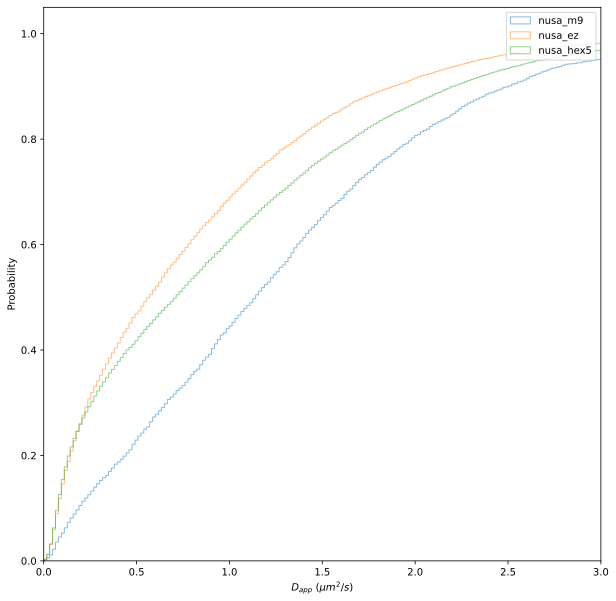

In [123]:
#plot the nusa data
#plot the diffusion coefficients as a cumulative histogram
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.))),
    500)
ax.hist(con_pix_si(test_batch_MSD_nusa_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


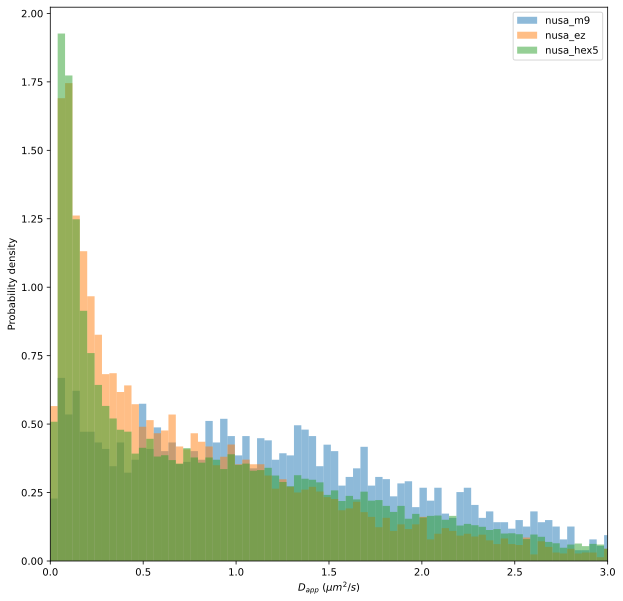

In [124]:
#plot the diffusion coefficients as normal histograms
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.))),
    200)
ax.hist(con_pix_si(test_batch_MSD_nusa_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_nusa_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True)
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


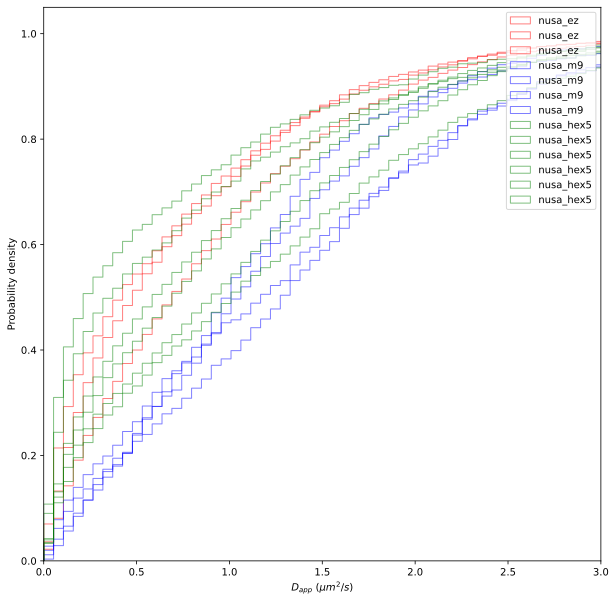

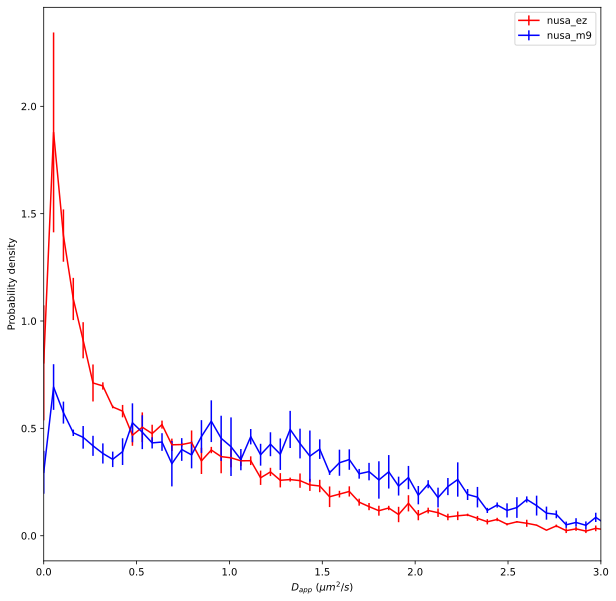

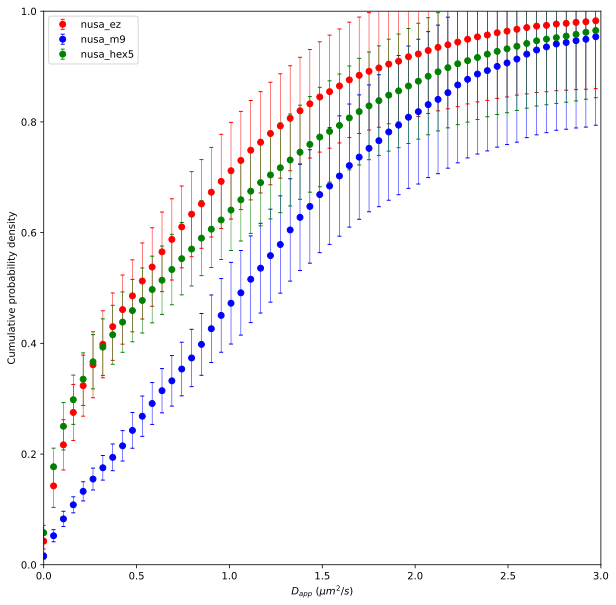

In [27]:
#test to see the difference between samples
#plot the diffusion coefficients as a cumulative histogram
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.))),
    150)
n_ez_nusa = np.zeros((len(test_batch_MSD_nusa_ez.keys())-1,len(bins)-1))
n_m9_nusa = np.zeros((len(test_batch_MSD_nusa_m9.keys())-1,len(bins)-1))
n_hex5_nusa = np.zeros((len(test_batch_MSD_nusa_hex5.keys())-1,len(bins)-1))

#plot the ez data but for each element in the batch
for i,j in test_batch_MSD_nusa_ez.items():
    #do not plot the "ALL"
    if (i != "ALL"):
        ax.hist(con_pix_si(test_batch_MSD_nusa_ez[i]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True,histtype="step",cumulative=True,color='r')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_nusa_ez[i]/1.,which="msd"),bins=bins,density=True)
        n_ez_nusa[int(i)-1,:] = n
for i,j in test_batch_MSD_nusa_m9.items():
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_nusa_m9[i]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True,histtype="step",cumulative=True,color='b')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_nusa_m9[i]/1.,which="msd"),bins=bins,density=True)
        n_m9_nusa[int(i)-1,:] = n
for i,j in test_batch_MSD_nusa_hex5.items():
    if i != "ALL":
        ax.hist(con_pix_si(test_batch_MSD_nusa_hex5[i]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True,histtype="step",cumulative=True,color='g')
        n,_ = np.histogram(con_pix_si(test_batch_MSD_nusa_hex5[i]/1.,which="msd"),bins=bins,density=True)
        n_hex5_nusa[int(i)-1,:] = n

#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#find the mean and standard error of the diffusion coefficients
mean_ez_nusa = np.mean(n_ez_nusa,axis=0)
std_ez_nusa = np.std(n_ez_nusa,axis=0,ddof=1)/np.sqrt(len(n_ez_nusa))
mean_m9_nusa = np.mean(n_m9_nusa,axis=0)
std_m9_nusa = np.std(n_m9_nusa,axis=0,ddof=1)/np.sqrt(len(n_m9_nusa))
mean_hex5_nusa = np.mean(n_hex5_nusa,axis=0)
std_hex5_nusa = np.std(n_hex5_nusa,axis=0,ddof=1)/np.sqrt(len(n_hex5_nusa))

#plot the mean and standard error of the diffusion coefficients
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],mean_ez_nusa,yerr=std_ez_nusa,label="nusa_ez",color='r')
ax.errorbar(bins[:-1],mean_m9_nusa,yerr=std_m9_nusa,label="nusa_m9",color='b')
#ax.errorbar(bins[:-1],mean_hex5_nusa,yerr=std_hex5_nusa,label="nusa_hex5",color='g')
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#repeat with the cumulative distribution
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],np.cumsum(mean_ez_nusa)/np.max(np.cumsum(mean_ez_nusa)),yerr=np.cumsum(std_ez_nusa)/np.max(np.cumsum(mean_ez_nusa)),label="nusa_ez",color='r',fmt='o',elinewidth=0.5,capsize=2)
ax.errorbar(bins[:-1],np.cumsum(mean_m9_nusa)/np.max(np.cumsum(mean_m9_nusa)),yerr=np.cumsum(std_m9_nusa)/np.max(np.cumsum(mean_m9_nusa)),label="nusa_m9",color='b',fmt='o',elinewidth=0.5,capsize=2)
ax.errorbar(bins[:-1],np.cumsum(mean_hex5_nusa)/np.max(np.cumsum(mean_hex5_nusa)),yerr=np.cumsum(std_hex5_nusa)/np.max(np.cumsum(mean_hex5_nusa)),label="nusa_hex5",color='g',fmt='o',elinewidth=0.5,capsize=2)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Cumulative probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_ylim(0,1)
plt.show()



Look at the behaviour of all growth for all strains

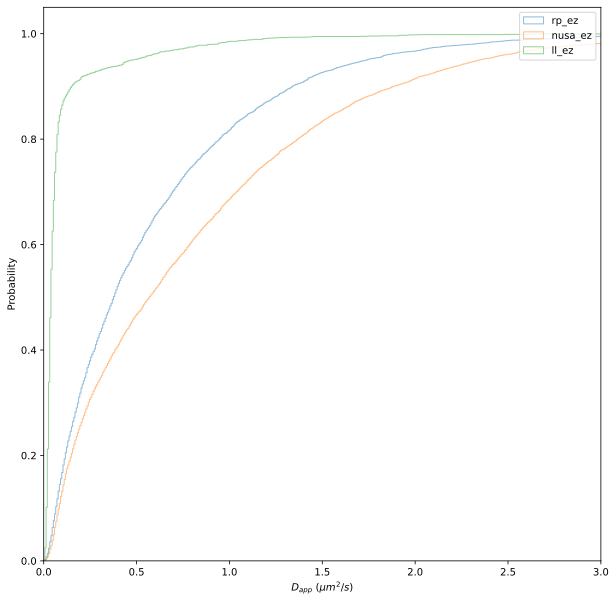

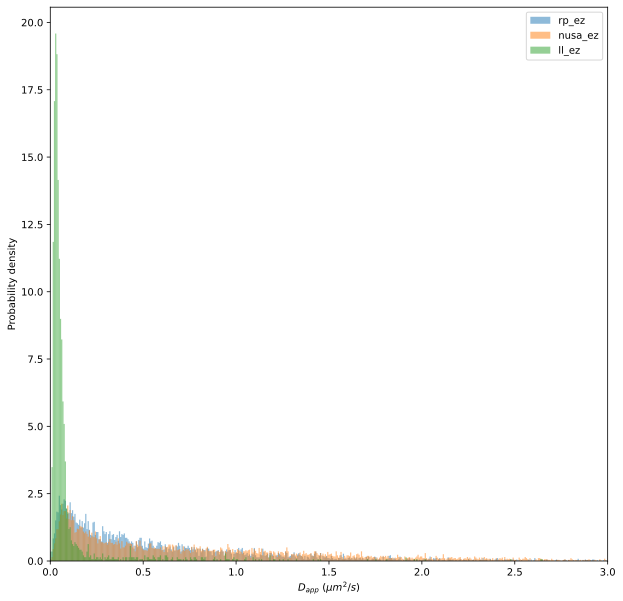

In [126]:
#plot the diffusion coefficients as cumulative histograms for rp_ez,nusa_ez, and ll_ez
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_rp_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#plot the diffusion coefficients as normal histograms for rp_ez,nusa_ez, and ll_ez
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_ez["ALL"]/1.,test_batch_MSD_nusa_ez["ALL"]/1.,test_batch_MSD_ll_ez["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_rp_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True)
ax.hist(con_pix_si(test_batch_MSD_nusa_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_ez["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


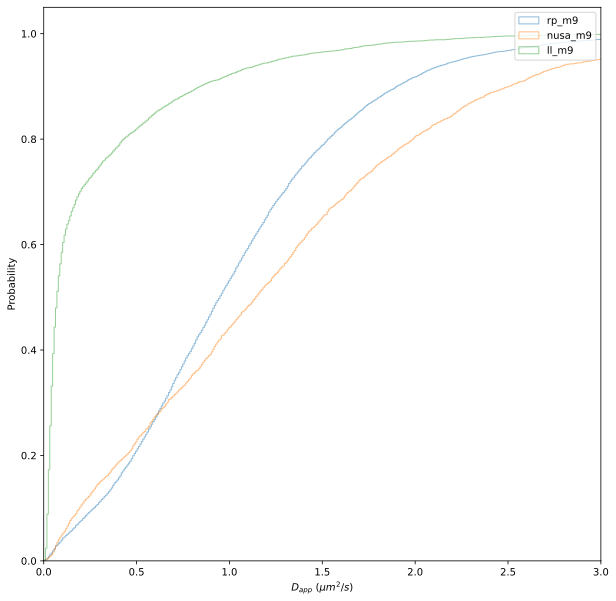

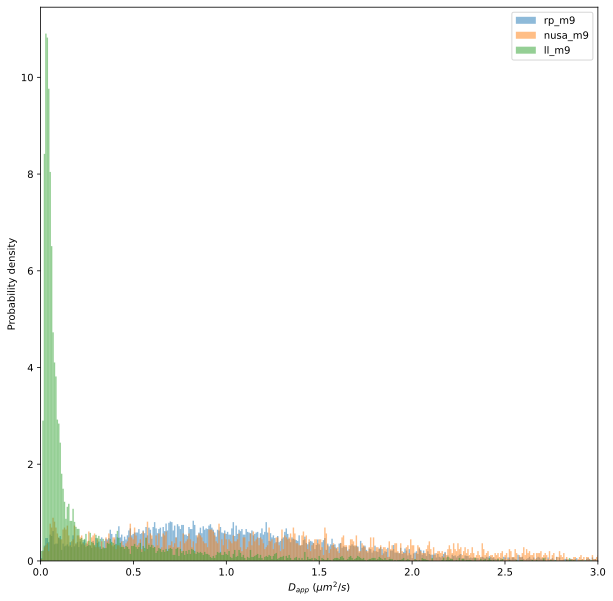

In [127]:
#plot the diffusion coefficients as cumulative histograms for rp_m9,nusa_m9, and ll_m9
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_ll_m9["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_ll_m9["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_rp_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#plot the diffusion coefficients as normal histograms for rp_m9,nusa_m9, and ll_m9
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_ll_m9["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_m9["ALL"]/1.,test_batch_MSD_nusa_m9["ALL"]/1.,test_batch_MSD_ll_m9["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_rp_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_nusa_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_m9["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


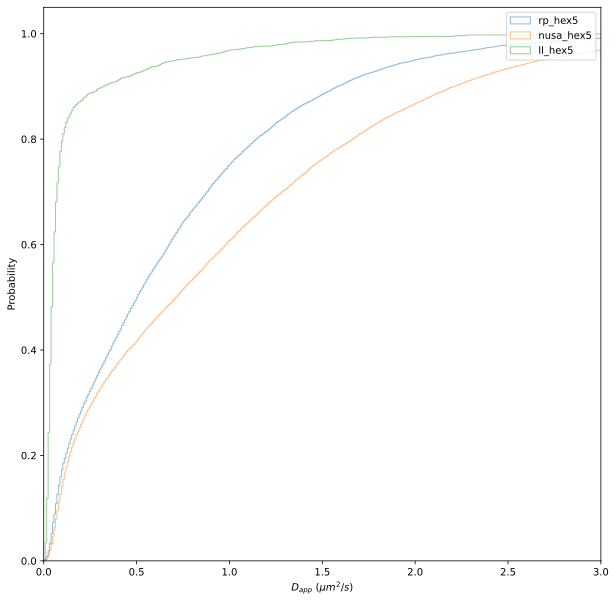

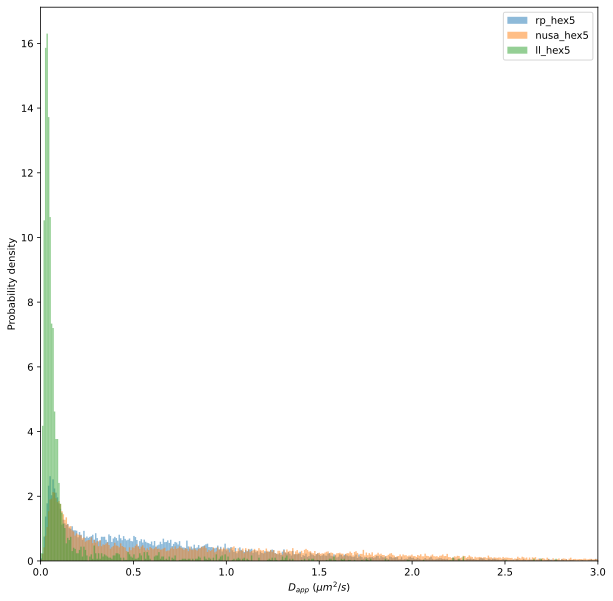

In [128]:
#plot the diffusion coefficients as cumulative histograms for rp_hex5,nusa_hex5, and ll_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_hex5["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_hex5["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_rp_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()

#plot the diffusion coefficients as normal histograms for rp_hex5,nusa_hex5, and ll_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_hex5["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_hex5["ALL"]/1.,test_batch_MSD_nusa_hex5["ALL"]/1.,test_batch_MSD_ll_hex5["ALL"]/1.))),
    1000)
ax.hist(con_pix_si(test_batch_MSD_rp_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True)
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_hex5["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()


Lets now try to redo the MSD but with mapped = "IN", "IO", "OUT"

In [41]:
#redo the mapping for the msds for every condition but with mapped = "IN"
mapped = "IN"
test_batch_MSD_rp_m9_IN = batch_MSD(test_batch_rp_m9,mapped=mapped)
test_batch_MSD_nusa_m9_IN = batch_MSD(test_batch_nusa_m9,mapped=mapped)
test_batch_MSD_ll_m9_IN = batch_MSD(test_batch_ll_m9,mapped=mapped)
test_batch_MSD_rp_ez_IN = batch_MSD(test_batch_rp_ez,mapped=mapped)
test_batch_MSD_nusa_ez_IN = batch_MSD(test_batch_nusa_ez,mapped=mapped)
test_batch_MSD_ll_ez_IN = batch_MSD(test_batch_ll_ez,mapped=mapped)
test_batch_MSD_rp_hex5_IN = batch_MSD(test_batch_rp_hex5,mapped=mapped)
test_batch_MSD_nusa_hex5_IN = batch_MSD(test_batch_nusa_hex5,mapped=mapped)
test_batch_MSD_ll_hex5_IN = batch_MSD(test_batch_ll_hex5,mapped=mapped)

#redo the mapping for the msds for every condition but with mapped = "IO"
mapped = "IO"
test_batch_MSD_rp_m9_IO = batch_MSD(test_batch_rp_m9,mapped=mapped)
test_batch_MSD_nusa_m9_IO = batch_MSD(test_batch_nusa_m9,mapped=mapped)
test_batch_MSD_ll_m9_IO = batch_MSD(test_batch_ll_m9,mapped=mapped)
test_batch_MSD_rp_ez_IO = batch_MSD(test_batch_rp_ez,mapped=mapped)
test_batch_MSD_nusa_ez_IO = batch_MSD(test_batch_nusa_ez,mapped=mapped)
test_batch_MSD_ll_ez_IO = batch_MSD(test_batch_ll_ez,mapped=mapped)
test_batch_MSD_rp_hex5_IO = batch_MSD(test_batch_rp_hex5,mapped=mapped)
test_batch_MSD_nusa_hex5_IO = batch_MSD(test_batch_nusa_hex5,mapped=mapped)
test_batch_MSD_ll_hex5_IO = batch_MSD(test_batch_ll_hex5,mapped=mapped)

#redo the mapping for the msds for every condition but with mapped = "OUT"
mapped = "OUT"
test_batch_MSD_rp_m9_OUT = batch_MSD(test_batch_rp_m9,mapped=mapped)
test_batch_MSD_nusa_m9_OUT = batch_MSD(test_batch_nusa_m9,mapped=mapped)
test_batch_MSD_ll_m9_OUT = batch_MSD(test_batch_ll_m9,mapped=mapped)
test_batch_MSD_rp_ez_OUT = batch_MSD(test_batch_rp_ez,mapped=mapped)
test_batch_MSD_nusa_ez_OUT = batch_MSD(test_batch_nusa_ez,mapped=mapped)
test_batch_MSD_ll_ez_OUT = batch_MSD(test_batch_ll_ez,mapped=mapped)
test_batch_MSD_rp_hex5_OUT = batch_MSD(test_batch_rp_hex5,mapped=mapped)
test_batch_MSD_nusa_hex5_OUT = batch_MSD(test_batch_nusa_hex5,mapped=mapped)
test_batch_MSD_ll_hex5_OUT = batch_MSD(test_batch_ll_hex5,mapped=mapped)

#redo the mapping for the msds for every condition but with mapped = "ALL"
mapped = "ALL"
test_batch_MSD_rp_m9_ALL = batch_MSD(test_batch_rp_m9,mapped=mapped)
test_batch_MSD_nusa_m9_ALL = batch_MSD(test_batch_nusa_m9,mapped=mapped)
test_batch_MSD_ll_m9_ALL = batch_MSD(test_batch_ll_m9,mapped=mapped)
test_batch_MSD_rp_ez_ALL= batch_MSD(test_batch_rp_ez,mapped=mapped)
test_batch_MSD_nusa_ez_ALL = batch_MSD(test_batch_nusa_ez,mapped=mapped)
test_batch_MSD_ll_ez_ALL = batch_MSD(test_batch_ll_ez,mapped=mapped)
test_batch_MSD_rp_hex5_ALL = batch_MSD(test_batch_rp_hex5,mapped=mapped)
test_batch_MSD_nusa_hex5_ALL = batch_MSD(test_batch_nusa_hex5,mapped=mapped)
test_batch_MSD_ll_hex5_ALL = batch_MSD(test_batch_ll_hex5,mapped=mapped)


In [42]:
#pickle the above data
pickle_data(test_batch_MSD_rp_m9_IN,cd,"test_batch_MSD_rp_m9_IN","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/IN_MSD")
pickle_data(test_batch_MSD_nusa_m9_IN,cd,"test_batch_MSD_nusa_m9_IN","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/IN_MSD")
pickle_data(test_batch_MSD_ll_m9_IN,cd,"test_batch_MSD_ll_m9_IN","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/IN_MSD")
pickle_data(test_batch_MSD_rp_ez_IN,cd,"test_batch_MSD_rp_ez_IN","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/IN_MSD")
pickle_data(test_batch_MSD_nusa_ez_IN,cd,"test_batch_MSD_nusa_ez_IN","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/IN_MSD")
pickle_data(test_batch_MSD_ll_ez_IN,cd,"test_batch_MSD_ll_ez_IN","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/IN_MSD")
pickle_data(test_batch_MSD_rp_hex5_IN,cd,"test_batch_MSD_rp_hex5_IN","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/IN_MSD")
pickle_data(test_batch_MSD_nusa_hex5_IN,cd,"test_batch_MSD_nusa_hex5_IN","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/IN_MSD")
pickle_data(test_batch_MSD_ll_hex5_IN,cd,"test_batch_MSD_ll_hex5_IN","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/IN_MSD")

pickle_data(test_batch_MSD_rp_m9_IO,cd,"test_batch_MSD_rp_m9_IO","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/IO_MSD")
pickle_data(test_batch_MSD_nusa_m9_IO,cd,"test_batch_MSD_nusa_m9_IO","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/IO_MSD")
pickle_data(test_batch_MSD_ll_m9_IO,cd,"test_batch_MSD_ll_m9_IO","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/IO_MSD")
pickle_data(test_batch_MSD_rp_ez_IO,cd,"test_batch_MSD_rp_ez_IO","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/IO_MSD")
pickle_data(test_batch_MSD_nusa_ez_IO,cd,"test_batch_MSD_nusa_ez_IO","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/IO_MSD")
pickle_data(test_batch_MSD_ll_ez_IO,cd,"test_batch_MSD_ll_ez_IO","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/IO_MSD")
pickle_data(test_batch_MSD_rp_hex5_IO,cd,"test_batch_MSD_rp_hex5_IO","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/IO_MSD")
pickle_data(test_batch_MSD_nusa_hex5_IO,cd,"test_batch_MSD_nusa_hex5_IO","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/IO_MSD")
pickle_data(test_batch_MSD_ll_hex5_IO,cd,"test_batch_MSD_ll_hex5_IO","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/IO_MSD")

pickle_data(test_batch_MSD_rp_m9_OUT,cd,"test_batch_MSD_rp_m9_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_nusa_m9_OUT,cd,"test_batch_MSD_nusa_m9_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_ll_m9_OUT,cd,"test_batch_MSD_ll_m9_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_rp_ez_OUT,cd,"test_batch_MSD_rp_ez_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_nusa_ez_OUT,cd,"test_batch_MSD_nusa_ez_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_ll_ez_OUT,cd,"test_batch_MSD_ll_ez_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_rp_hex5_OUT,cd,"test_batch_MSD_rp_hex5_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_nusa_hex5_OUT,cd,"test_batch_MSD_nusa_hex5_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/OUT_MSD")
pickle_data(test_batch_MSD_ll_hex5_OUT,cd,"test_batch_MSD_ll_hex5_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/OUT_MSD")


pickle_data(test_batch_MSD_rp_m9_ALL,cd,"test_batch_MSD_rp_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_nusa_m9_ALL,cd,"test_batch_MSD_nusa_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_ll_m9_ALL,cd,"test_batch_MSD_ll_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_rp_ez_ALL,cd,"test_batch_MSD_rp_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_nusa_ez_ALL,cd,"test_batch_MSD_nusa_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_ll_ez_ALL,cd,"test_batch_MSD_ll_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_rp_hex5_ALL,cd,"test_batch_MSD_rp_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_nusa_hex5_ALL,cd,"test_batch_MSD_nusa_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/ALL_MSD")
pickle_data(test_batch_MSD_ll_hex5_ALL,cd,"test_batch_MSD_ll_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/ALL_MSD")







In [28]:
#load the pickled data
test_batch_MSD_rp_m9_IN = load_pickle_data(cd,"test_batch_MSD_rp_m9_IN","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/IN_MSD")
test_batch_MSD_nusa_m9_IN = load_pickle_data(cd,"test_batch_MSD_nusa_m9_IN","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/IN_MSD")
test_batch_MSD_ll_m9_IN = load_pickle_data(cd,"test_batch_MSD_ll_m9_IN","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/IN_MSD")
test_batch_MSD_rp_ez_IN = load_pickle_data(cd,"test_batch_MSD_rp_ez_IN","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/IN_MSD")
test_batch_MSD_nusa_ez_IN = load_pickle_data(cd,"test_batch_MSD_nusa_ez_IN","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/IN_MSD")
test_batch_MSD_ll_ez_IN = load_pickle_data(cd,"test_batch_MSD_ll_ez_IN","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/IN_MSD")
test_batch_MSD_rp_hex5_IN = load_pickle_data(cd,"test_batch_MSD_rp_hex5_IN","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/IN_MSD")
test_batch_MSD_nusa_hex5_IN = load_pickle_data(cd,"test_batch_MSD_nusa_hex5_IN","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/IN_MSD")
test_batch_MSD_ll_hex5_IN = load_pickle_data(cd,"test_batch_MSD_ll_hex5_IN","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/IN_MSD")

test_batch_MSD_rp_m9_IO = load_pickle_data(cd,"test_batch_MSD_rp_m9_IO","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/IO_MSD")
test_batch_MSD_nusa_m9_IO = load_pickle_data(cd,"test_batch_MSD_nusa_m9_IO","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/IO_MSD")
test_batch_MSD_ll_m9_IO = load_pickle_data(cd,"test_batch_MSD_ll_m9_IO","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/IO_MSD")
test_batch_MSD_rp_ez_IO = load_pickle_data(cd,"test_batch_MSD_rp_ez_IO","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/IO_MSD")
test_batch_MSD_nusa_ez_IO = load_pickle_data(cd,"test_batch_MSD_nusa_ez_IO","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/IO_MSD")
test_batch_MSD_ll_ez_IO = load_pickle_data(cd,"test_batch_MSD_ll_ez_IO","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/IO_MSD")
test_batch_MSD_rp_hex5_IO = load_pickle_data(cd,"test_batch_MSD_rp_hex5_IO","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/IO_MSD")
test_batch_MSD_nusa_hex5_IO = load_pickle_data(cd,"test_batch_MSD_nusa_hex5_IO","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/IO_MSD")
test_batch_MSD_ll_hex5_IO = load_pickle_data(cd,"test_batch_MSD_ll_hex5_IO","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/IO_MSD")

test_batch_MSD_rp_m9_OUT = load_pickle_data(cd,"test_batch_MSD_rp_m9_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/OUT_MSD")
test_batch_MSD_nusa_m9_OUT = load_pickle_data(cd,"test_batch_MSD_nusa_m9_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/OUT_MSD")
test_batch_MSD_ll_m9_OUT = load_pickle_data(cd,"test_batch_MSD_ll_m9_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/OUT_MSD")
test_batch_MSD_rp_ez_OUT = load_pickle_data(cd,"test_batch_MSD_rp_ez_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/OUT_MSD")
test_batch_MSD_nusa_ez_OUT = load_pickle_data(cd,"test_batch_MSD_nusa_ez_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/OUT_MSD")
test_batch_MSD_ll_ez_OUT = load_pickle_data(cd,"test_batch_MSD_ll_ez_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/OUT_MSD")
test_batch_MSD_rp_hex5_OUT = load_pickle_data(cd,"test_batch_MSD_rp_hex5_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/OUT_MSD")
test_batch_MSD_nusa_hex5_OUT = load_pickle_data(cd,"test_batch_MSD_nusa_hex5_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/OUT_MSD")
test_batch_MSD_ll_hex5_OUT = load_pickle_data(cd,"test_batch_MSD_ll_hex5_OUT","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/OUT_MSD")

test_batch_MSD_rp_m9_ALL = load_pickle_data(cd,"test_batch_MSD_rp_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/m9_tlen5/ALL_MSD")
test_batch_MSD_nusa_m9_ALL = load_pickle_data(cd,"test_batch_MSD_nusa_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/m9_tlen5/ALL_MSD")
test_batch_MSD_ll_m9_ALL = load_pickle_data(cd,"test_batch_MSD_ll_m9_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/m9_tlen5/ALL_MSD")
test_batch_MSD_rp_ez_ALL = load_pickle_data(cd,"test_batch_MSD_rp_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/ez_tlen5/ALL_MSD")
test_batch_MSD_nusa_ez_ALL = load_pickle_data(cd,"test_batch_MSD_nusa_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/ez_tlen5/ALL_MSD")
test_batch_MSD_ll_ez_ALL = load_pickle_data(cd,"test_batch_MSD_ll_ez_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/ez_tlen5/ALL_MSD")
test_batch_MSD_rp_hex5_ALL = load_pickle_data(cd,"test_batch_MSD_rp_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/RPOC/hex5_tlen5/ALL_MSD")
test_batch_MSD_nusa_hex5_ALL = load_pickle_data(cd,"test_batch_MSD_nusa_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/NUSA/hex5_tlen5/ALL_MSD")
test_batch_MSD_ll_hex5_ALL = load_pickle_data(cd,"test_batch_MSD_ll_hex5_ALL","mapped_dict_pickeled/TRACKMATE_BLOB/LL/hex5_tlen5/ALL_MSD")


IN ANALYSIS

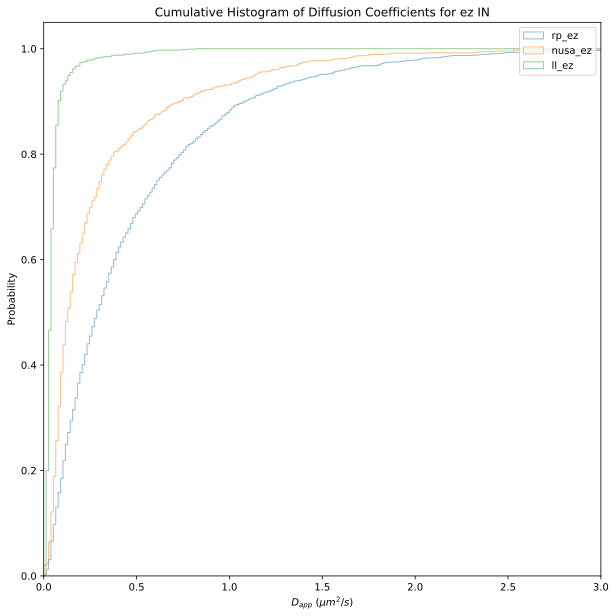

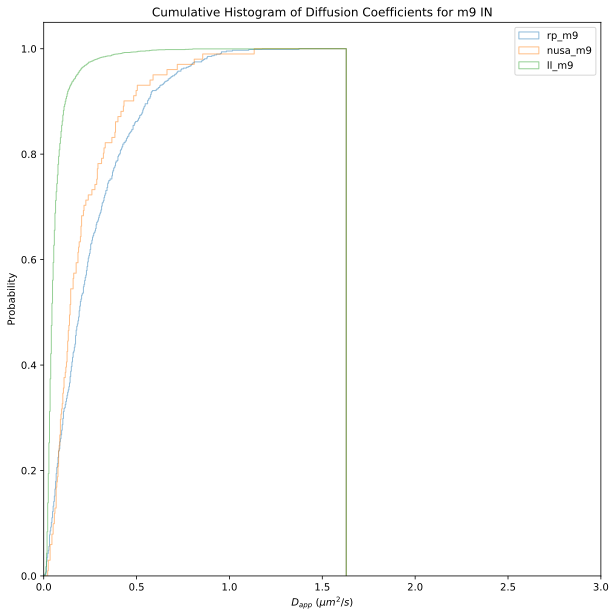

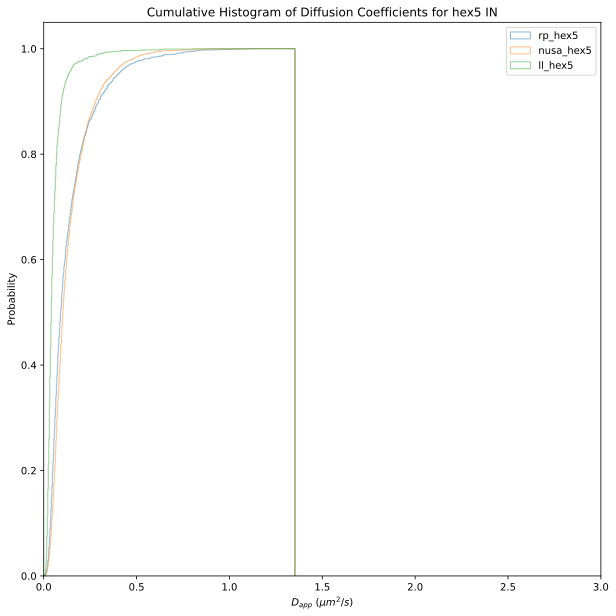

In [129]:
#plot the diffusion coefficients as cumulative histograms for rp_ez,nusa_ez, and ll_ez
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_ll_ez_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_ll_ez_IN["ALL"]/1.))),
    500)
ax.hist(con_pix_si(test_batch_MSD_rp_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for ez IN")
plt.show()

#do the same for m9
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_ll_m9_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_ll_m9_IN["ALL"]/1.))),
    500)
ax.hist(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for m9 IN")
plt.show()

#do the same for hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_hex5_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.,test_batch_MSD_ll_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_hex5_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.,test_batch_MSD_ll_hex5_IN["ALL"]/1.))),
    500)
ax.hist(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for hex5 IN")
plt.show()


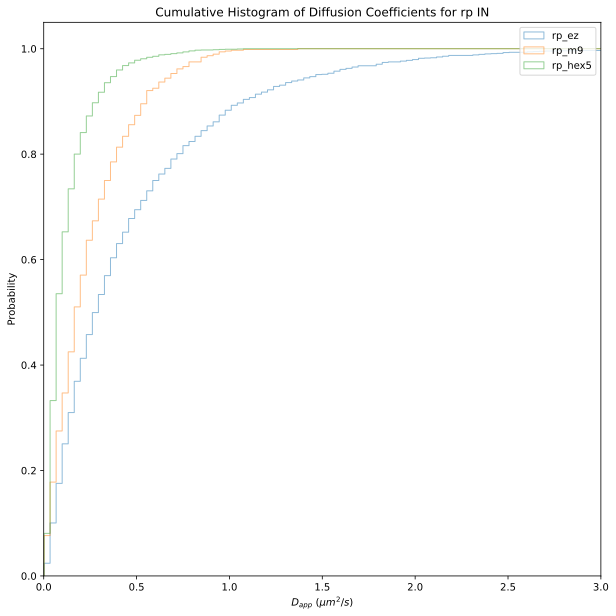

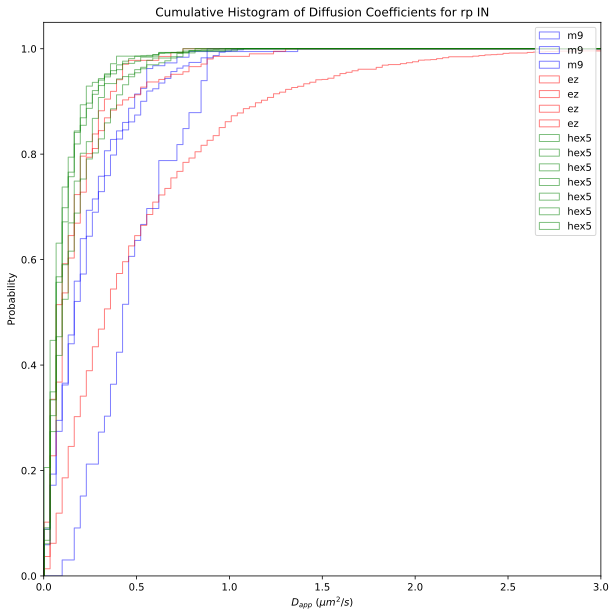

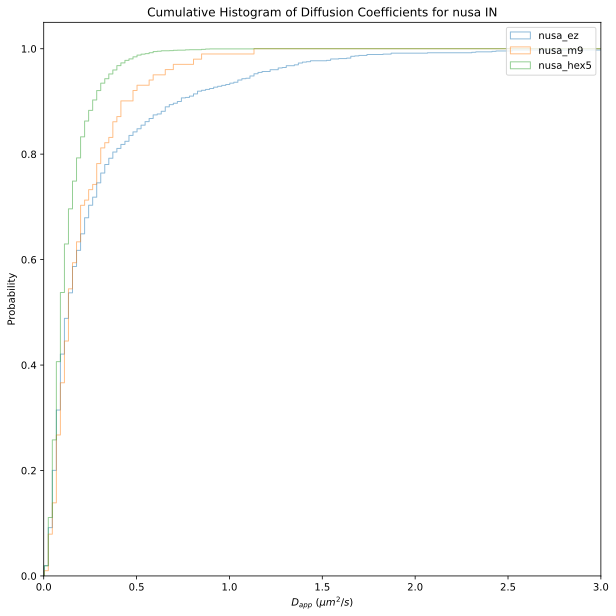

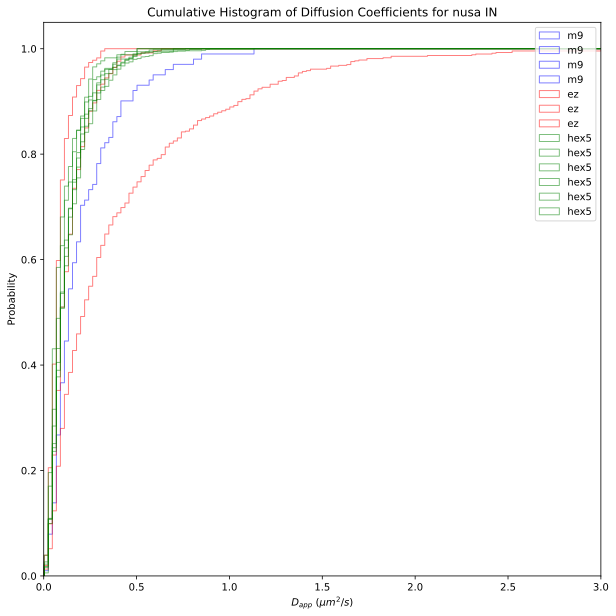

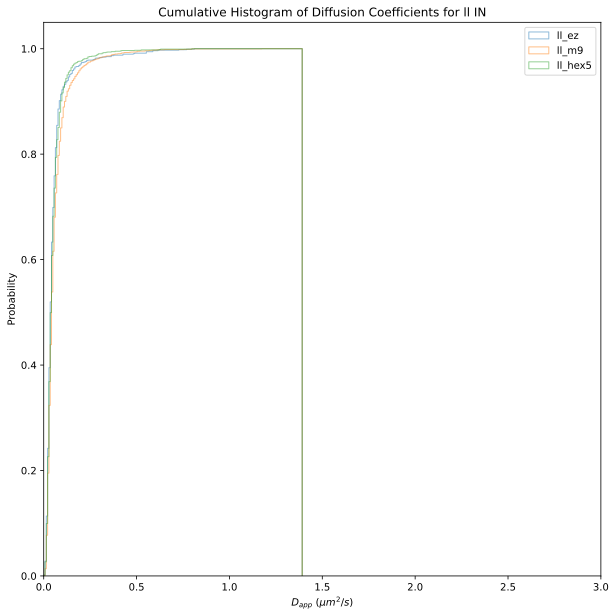

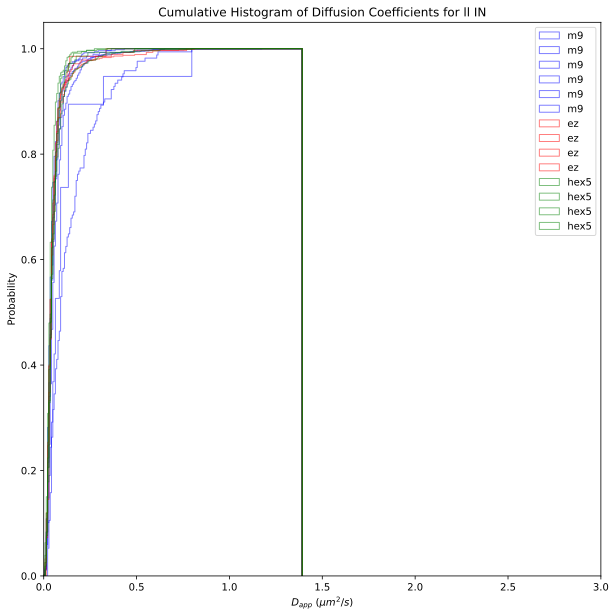

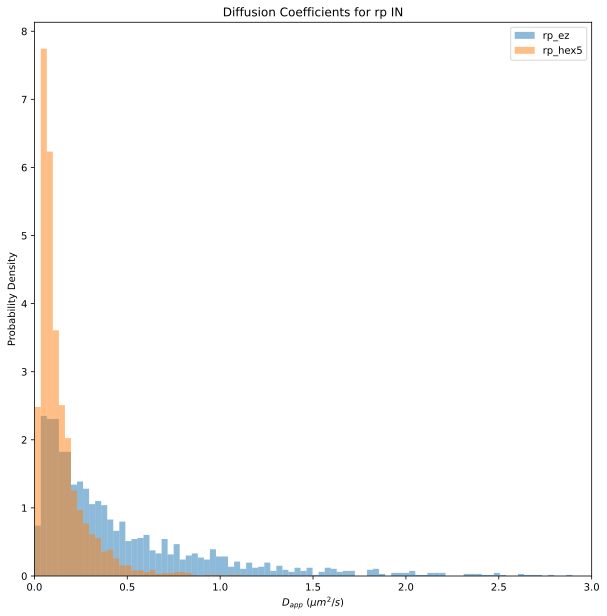

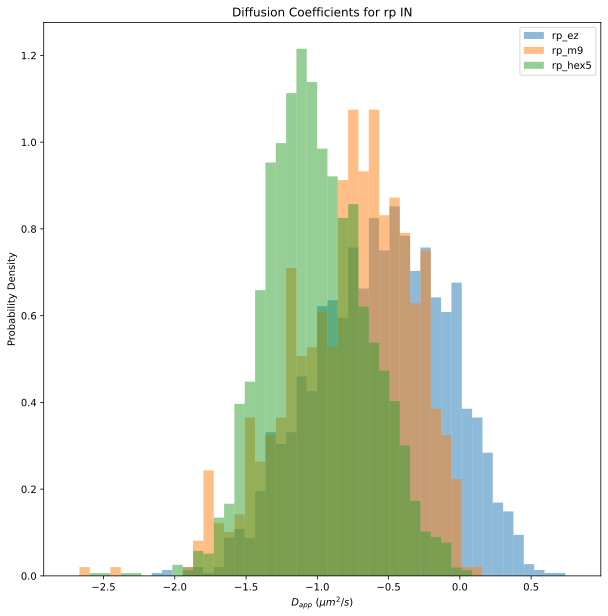

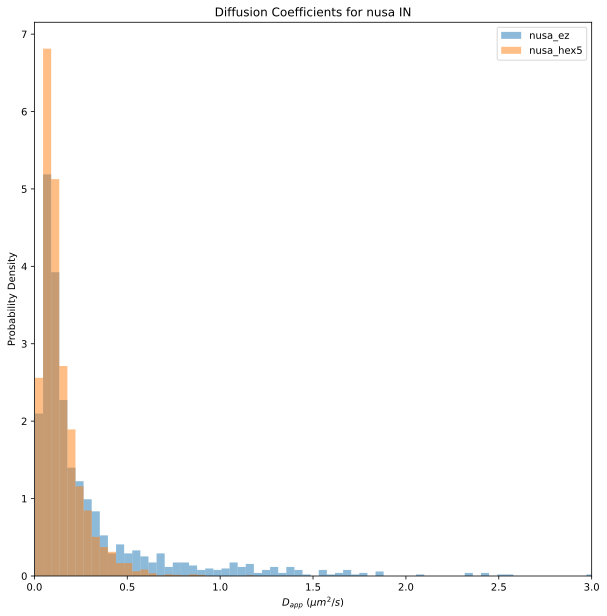

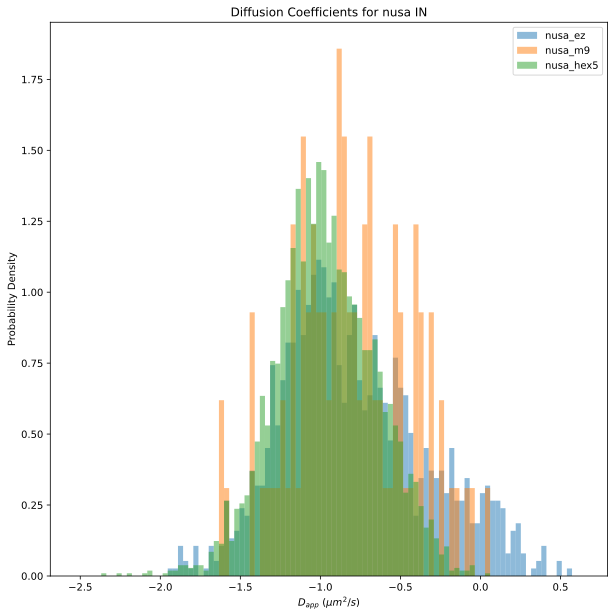

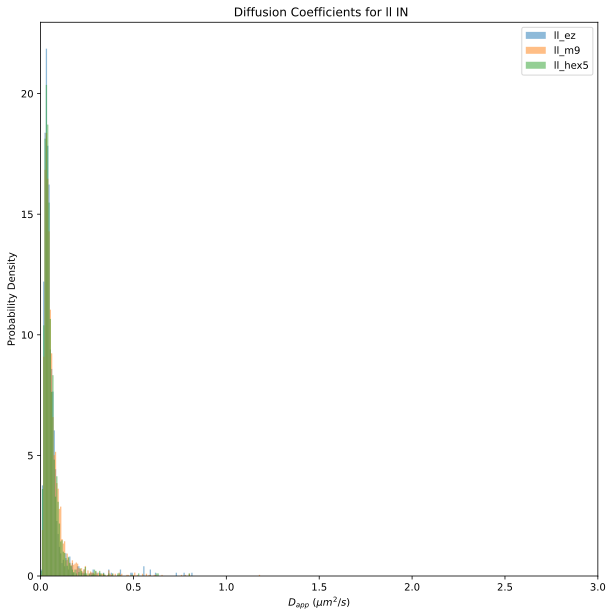

In [169]:
#plot the cumulative histograms for the diffusion coefficients for rp_ez,rp_m9,rp_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_rp_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_rp_hex5_IN["ALL"]/1.))),
    200)
ax.hist(con_pix_si(test_batch_MSD_rp_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for rp IN")
plt.show()

rp_ez_in = np.zeros((len(test_batch_MSD_rp_ez_IN.keys())-1,len(bins)-1))
rp_m9_in = np.zeros((len(test_batch_MSD_rp_m9_IN.keys())-1,len(bins)-1))
rp_hex5_in = np.zeros((len(test_batch_MSD_rp_hex5_IN.keys())-1,len(bins)-1))


#plot the samples in each 
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i,j in test_batch_MSD_rp_m9_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="m9",density=True,cumulative=True,histtype="step",color="blue")
        n,_ = np.histogram(con_pix_si(test_batch_MSD_nusa_ez[i]/1.,which="msd"),bins=bins,density=True)
        rp_m9_in[int(i)-1,:] = n
for i,j in test_batch_MSD_rp_ez_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="ez",density=True,cumulative=True,histtype="step",color="red")
        n,_ = np.histogram(con_pix_si(test_batch_MSD_nusa_ez[i]/1.,which="msd"),bins=bins,density=True)
        rp_ez_in[int(i)-1,:] = n
for i,j in test_batch_MSD_rp_hex5_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="hex5",density=True,cumulative=True,histtype="step",color="green")
        n,_ = np.histogram(con_pix_si(test_batch_MSD_nusa_ez[i]/1.,which="msd"),bins=bins,density=True)
        rp_hex5_in[int(i)-1,:] = n
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for rp IN")
plt.show()

#find the mean and standard error of the diffusion coefficients
mean_ez_rp_IN = np.mean(rp_ez_in,axis=0)
std_ez_rp_IN = np.std(rp_ez_in,axis=0,ddof=1)/np.sqrt(len(rp_ez_in))
mean_m9_rp_IN = np.mean(rp_m9_in,axis=0)
std_m9_rp_IN = np.std(rp_m9_in,axis=0,ddof=1)/np.sqrt(len(rp_m9_in))
mean_hex5_rp_IN = np.mean(rp_hex5_in,axis=0)
std_hex5_rp_IN = np.std(rp_hex5_in,axis=0,ddof=1)/np.sqrt(len(rp_hex5_in))

#plot the mean and standard error of the diffusion coefficients
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.errorbar(bins[:-1],mean_ez_rp_IN,yerr=std_ez_rp_IN,label="nusa_ez",color='r')
ax.errorbar(bins[:-1],mean_m9_rp_IN,yerr=mean_m9_rp_IN,label="nusa_m9",color='b')
ax.errorbar(bins[:-1],mean_hex5_rp_IN,yerr=std_hex5_rp_IN,label="nusa_hex5",color='g')
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
plt.show()



#plot the cumulative histograms for the diffusion coefficients for nusa_ez,nusa_m9,nusa_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.))),
    200)
ax.hist(con_pix_si(test_batch_MSD_nusa_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for nusa IN")
plt.show()

#plot the samples in each
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i,j in test_batch_MSD_nusa_m9_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="m9",density=True,cumulative=True,histtype="step",color="blue")
for i,j in test_batch_MSD_nusa_ez_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="ez",density=True,cumulative=True,histtype="step",color="red")
for i,j in test_batch_MSD_nusa_hex5_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="hex5",density=True,cumulative=True,histtype="step",color="green")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for nusa IN")
plt.show()




#plot the cumulative histograms for the diffusion coefficients for ll_ez,ll_m9,ll_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_ll_ez_IN["ALL"]/1.,test_batch_MSD_ll_m9_IN["ALL"]/1.,test_batch_MSD_ll_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_ll_ez_IN["ALL"]/1.,test_batch_MSD_ll_m9_IN["ALL"]/1.,test_batch_MSD_ll_hex5_IN["ALL"]/1.))),
    200)
ax.hist(con_pix_si(test_batch_MSD_ll_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True,cumulative=True,histtype="step")
ax.hist(con_pix_si(test_batch_MSD_ll_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True,cumulative=True,histtype="step")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for ll IN")
plt.show()

#plot the samples in each
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i,j in test_batch_MSD_ll_m9_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="m9",density=True,cumulative=True,histtype="step",color="blue")
for i,j in test_batch_MSD_ll_ez_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="ez",density=True,cumulative=True,histtype="step",color="red")
for i,j in test_batch_MSD_ll_hex5_IN.items():
    if i != "ALL":
        ax.hist(con_pix_si(j/1.,which="msd"),bins=bins,alpha=0.5,label="hex5",density=True,cumulative=True,histtype="step",color="green")
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Cumulative Histogram of Diffusion Coefficients for ll IN")
plt.show()




#replot the above as normal histograms
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_rp_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_rp_hex5_IN["ALL"]/1.))),
    200)
ax.hist(con_pix_si(test_batch_MSD_rp_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_ez",density=True)
#ax.hist(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="rp_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability Density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Diffusion Coefficients for rp IN")
plt.show()

#replot the above as normal histograms
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.log10(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_rp_hex5_IN["ALL"]/1.)))),
    np.max(np.log10(np.concatenate((test_batch_MSD_rp_ez_IN["ALL"]/1.,test_batch_MSD_rp_m9_IN["ALL"]/1.,test_batch_MSD_rp_hex5_IN["ALL"]/1.)))),
    50)
ax.hist(np.log10(con_pix_si(test_batch_MSD_rp_ez_IN["ALL"]/1.,which="msd")),bins=bins,alpha=0.5,label="rp_ez",density=True)
ax.hist(np.log10(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd")),bins=bins,alpha=0.5,label="rp_m9",density=True)
ax.hist(np.log10(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd")),bins=bins,alpha=0.5,label="rp_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability Density")
ax.legend()
#set xlims from 0-1
#ax.set_xlim(0,3)
ax.set_title("Diffusion Coefficients for rp IN")
plt.show()


#plot the cumulative histograms for the diffusion coefficients for nusa_ez,nusa_m9,nusa_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.))),
    100)
ax.hist(con_pix_si(test_batch_MSD_nusa_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_ez",density=True)
#ax.hist(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="nusa_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability Density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title("Diffusion Coefficients for nusa IN")
plt.show()

#plot the cumulative histograms for the diffusion coefficients for nusa_ez,nusa_m9,nusa_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.log10(np.concatenate((test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.)))),
    np.max(np.log10(np.concatenate((test_batch_MSD_nusa_ez_IN["ALL"]/1.,test_batch_MSD_nusa_m9_IN["ALL"]/1.,test_batch_MSD_nusa_hex5_IN["ALL"]/1.)))),
    100)
ax.hist(np.log10(con_pix_si(test_batch_MSD_nusa_ez_IN["ALL"]/1.,which="msd")),bins=bins,alpha=0.5,label="nusa_ez",density=True)
ax.hist(np.log10(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd")),bins=bins,alpha=0.5,label="nusa_m9",density=True)
ax.hist(np.log10(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd")),bins=bins,alpha=0.5,label="nusa_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability Density")
ax.legend()
#set xlims from 0-1
#ax.set_xlim(0,3)
ax.set_title("Diffusion Coefficients for nusa IN")
plt.show()

#plot the cumulative histograms for the diffusion coefficients for ll_ez,ll_m9,ll_hex5
fig,ax = plt.subplots(1,1,figsize=(10,10))
#find a common set of bins for all the data to make sure the histograms are comparable
bins = np.linspace(
    np.min(np.concatenate((test_batch_MSD_ll_ez_IN["ALL"]/1.,test_batch_MSD_ll_m9_IN["ALL"]/1.,test_batch_MSD_ll_hex5_IN["ALL"]/1.))),
    np.max(np.concatenate((test_batch_MSD_ll_ez_IN["ALL"]/1.,test_batch_MSD_ll_m9_IN["ALL"]/1.,test_batch_MSD_ll_hex5_IN["ALL"]/1.))),
    200)
ax.hist(con_pix_si(test_batch_MSD_ll_ez_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_ez",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_m9_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_m9",density=True)
ax.hist(con_pix_si(test_batch_MSD_ll_hex5_IN["ALL"]/1.,which="msd"),bins=bins,alpha=0.5,label="ll_hex5",density=True)
#label the x axis as Diffusion Coefficient with latex formatting for the units (um^2/s)
ax.set_xlabel(r"$D_{app}$ ($\mu m^2/s$)")
ax.set_ylabel("Probability Density")
ax.legend()
#set xlims from 0-1
ax.set_xlim(0,3)
ax.set_title(" Diffusion Coefficients for ll IN")
plt.show()


Perform GMM model fitting to these data

Check the optimal number of components to fit

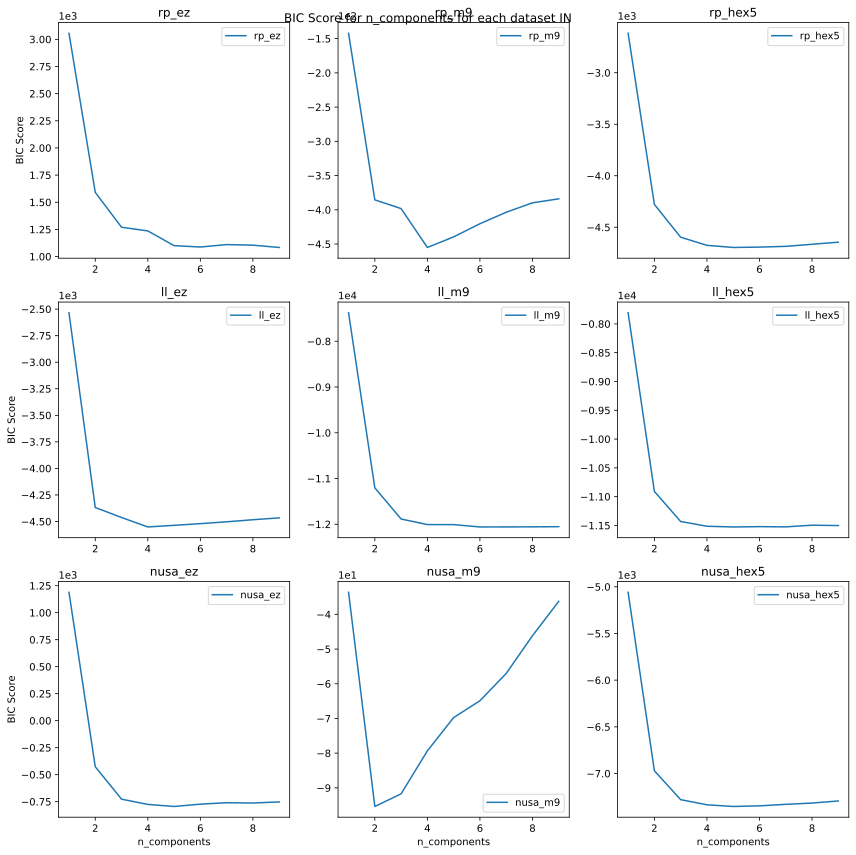

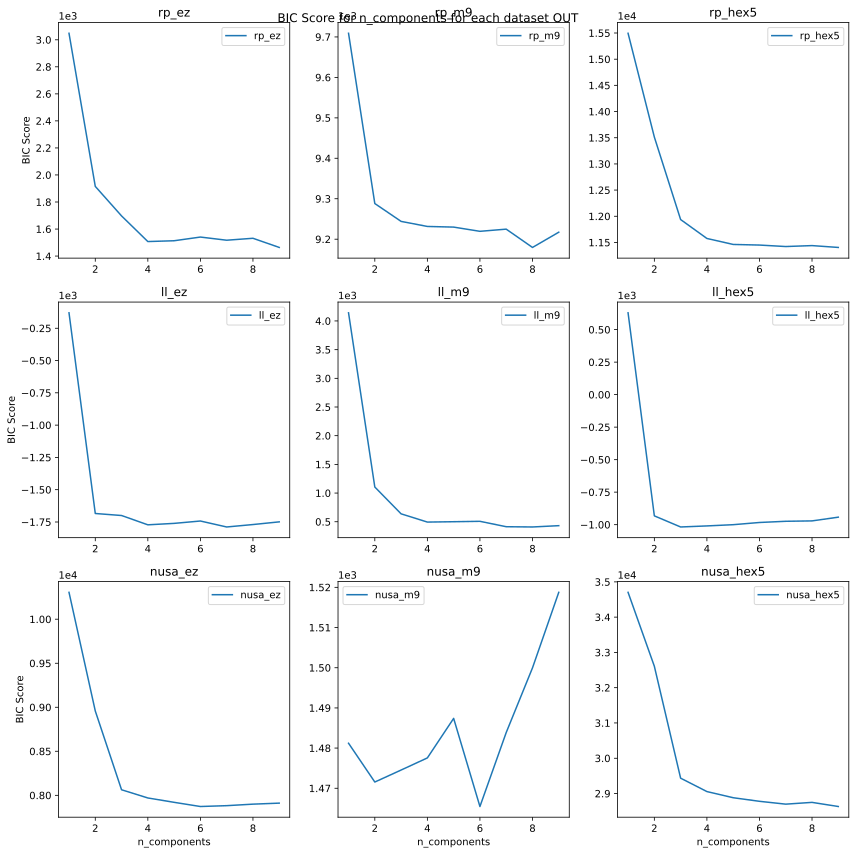

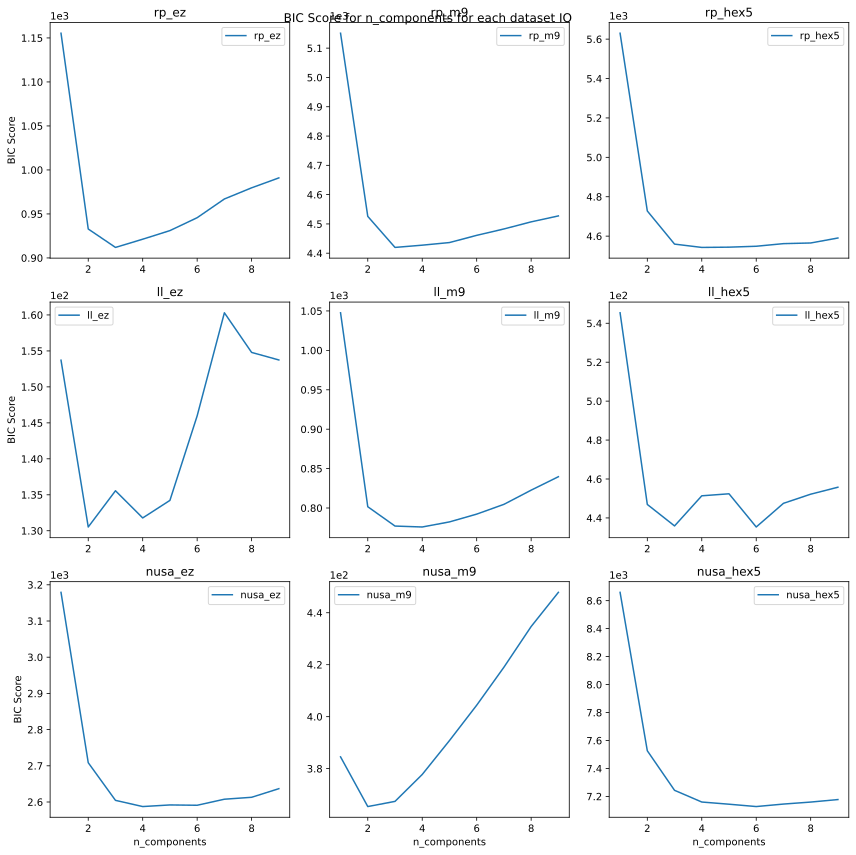

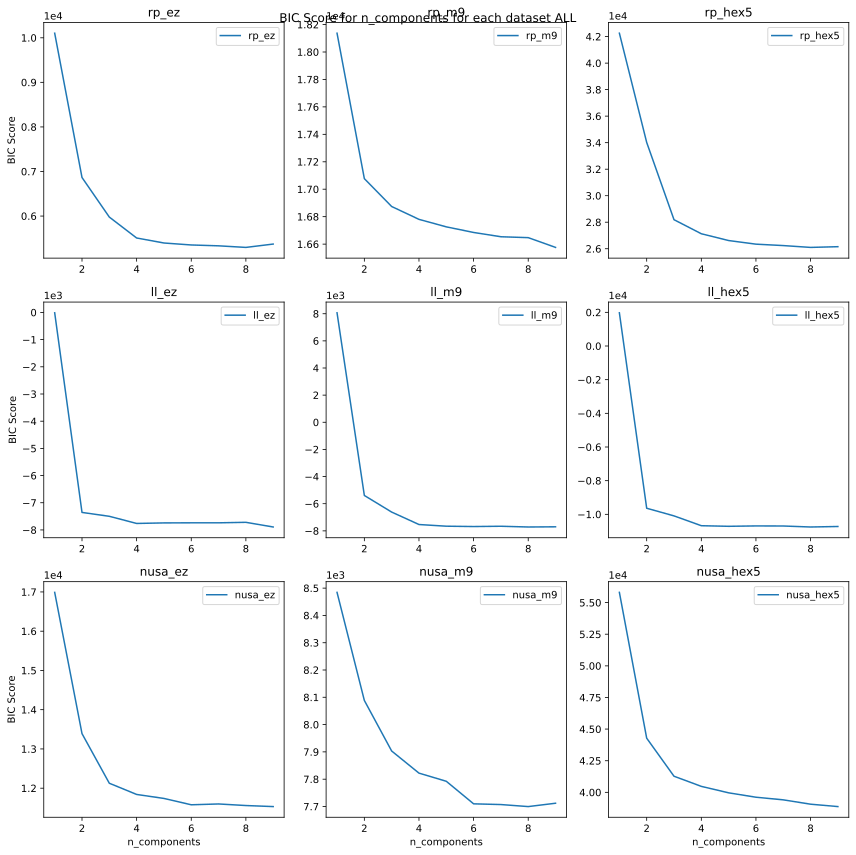

In [41]:
#use GMM_1D to fit a GMM model to the data
#first define the number of components to use as an array
n_components = np.arange(1,10,1)
from src.helpers.Analysis_functions import GMM_1D
#fit the GMM model to the data
#GMM_1D is a function that fits a GMM model to the data and returns the model and the BIC score
#the BIC score is a measure of how well the model fits the data
#the lower the BIC score the better the model fits the data
gmm_rp_ez_IN = []
gmm_rp_m9_IN = []
gmm_rp_hex5_IN = []
gmm_ll_ez_IN = []
gmm_ll_m9_IN = []
gmm_ll_hex5_IN = []
gmm_nusa_ez_IN = []
gmm_nusa_m9_IN = []
gmm_nusa_hex5_IN = []
for n in n_components:
    gmm_rp_ez_IN.append(GMM_1D(con_pix_si(test_batch_MSD_rp_ez_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_m9_IN.append(GMM_1D(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_hex5_IN.append(GMM_1D(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_ez_IN.append(GMM_1D(con_pix_si(test_batch_MSD_ll_ez_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_m9_IN.append(GMM_1D(con_pix_si(test_batch_MSD_ll_m9_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_hex5_IN.append(GMM_1D(con_pix_si(test_batch_MSD_ll_hex5_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_ez_IN.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_ez_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_m9_IN.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_hex5_IN.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd"),n_components=n))

#lets plot the BIC score as a function of the number of components
fig,ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].plot(n_components,[gmm_rp_ez_IN[i][3].bic(con_pix_si(test_batch_MSD_rp_ez_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_ez_IN))],label="rp_ez")
ax[0,0].set_title("rp_ez")
ax[0,1].plot(n_components,[gmm_rp_m9_IN[i][3].bic(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_m9_IN))],label="rp_m9")
ax[0,1].set_title("rp_m9")
ax[0,2].plot(n_components,[gmm_rp_hex5_IN[i][3].bic(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_hex5_IN))],label="rp_hex5")
ax[0,2].set_title("rp_hex5")
ax[1,0].plot(n_components,[gmm_ll_ez_IN[i][3].bic(con_pix_si(test_batch_MSD_ll_ez_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_ez_IN))],label="ll_ez")
ax[1,0].set_title("ll_ez")
ax[1,1].plot(n_components,[gmm_ll_m9_IN[i][3].bic(con_pix_si(test_batch_MSD_ll_m9_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_m9_IN))],label="ll_m9")
ax[1,1].set_title("ll_m9")
ax[1,2].plot(n_components,[gmm_ll_hex5_IN[i][3].bic(con_pix_si(test_batch_MSD_ll_hex5_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_hex5_IN))],label="ll_hex5")
ax[1,2].set_title("ll_hex5")
ax[2,0].plot(n_components,[gmm_nusa_ez_IN[i][3].bic(con_pix_si(test_batch_MSD_nusa_ez_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_ez_IN))],label="nusa_ez")
ax[2,0].set_title("nusa_ez")
ax[2,1].plot(n_components,[gmm_nusa_m9_IN[i][3].bic(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_m9_IN))],label="nusa_m9")
ax[2,1].set_title("nusa_m9")
ax[2,2].plot(n_components,[gmm_nusa_hex5_IN[i][3].bic(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_hex5_IN))],label="nusa_hex5")
ax[2,2].set_title("nusa_hex5")
for i in range(3):
    for j in range(3):
        ax[i,j].legend()
        #show the yticks as scientific notation
        ax[i,j].ticklabel_format(axis="y",style="sci",scilimits=(0,0))
        #only label the bottom row
        ax[2,j].set_xlabel("n_components")
    #only label the left column
    ax[i,0].set_ylabel("BIC Score")
plt.tight_layout()
#set title for the entire figure
fig.suptitle("BIC Score for n_components for each dataset IN")
plt.show()


#repeat the above for the OUT dataset
gmm_rp_ez_OUT = []
gmm_rp_m9_OUT = []
gmm_rp_hex5_OUT = []
gmm_ll_ez_OUT = []
gmm_ll_m9_OUT = []
gmm_ll_hex5_OUT = []
gmm_nusa_ez_OUT = []
gmm_nusa_m9_OUT = []
gmm_nusa_hex5_OUT = []
for n in n_components:
    gmm_rp_ez_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_rp_ez_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_m9_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_rp_m9_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_hex5_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_rp_hex5_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_ez_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_ll_ez_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_m9_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_ll_m9_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_hex5_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_ll_hex5_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_ez_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_ez_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_m9_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_m9_OUT["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_hex5_OUT.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_hex5_OUT["ALL"]/1.,which="msd"),n_components=n))

fig,ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].plot(n_components,[gmm_rp_ez_OUT[i][3].bic(con_pix_si(test_batch_MSD_rp_ez_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_ez_OUT))],label="rp_ez")
ax[0,0].set_title("rp_ez")
ax[0,1].plot(n_components,[gmm_rp_m9_OUT[i][3].bic(con_pix_si(test_batch_MSD_rp_m9_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_m9_OUT))],label="rp_m9")
ax[0,1].set_title("rp_m9")
ax[0,2].plot(n_components,[gmm_rp_hex5_OUT[i][3].bic(con_pix_si(test_batch_MSD_rp_hex5_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_hex5_OUT))],label="rp_hex5")
ax[0,2].set_title("rp_hex5")
ax[1,0].plot(n_components,[gmm_ll_ez_OUT[i][3].bic(con_pix_si(test_batch_MSD_ll_ez_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_ez_OUT))],label="ll_ez")
ax[1,0].set_title("ll_ez")
ax[1,1].plot(n_components,[gmm_ll_m9_OUT[i][3].bic(con_pix_si(test_batch_MSD_ll_m9_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_m9_OUT))],label="ll_m9")
ax[1,1].set_title("ll_m9")
ax[1,2].plot(n_components,[gmm_ll_hex5_OUT[i][3].bic(con_pix_si(test_batch_MSD_ll_hex5_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_hex5_OUT))],label="ll_hex5")
ax[1,2].set_title("ll_hex5")
ax[2,0].plot(n_components,[gmm_nusa_ez_OUT[i][3].bic(con_pix_si(test_batch_MSD_nusa_ez_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_ez_OUT))],label="nusa_ez")
ax[2,0].set_title("nusa_ez")
ax[2,1].plot(n_components,[gmm_nusa_m9_OUT[i][3].bic(con_pix_si(test_batch_MSD_nusa_m9_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_m9_OUT))],label="nusa_m9")
ax[2,1].set_title("nusa_m9")
ax[2,2].plot(n_components,[gmm_nusa_hex5_OUT[i][3].bic(con_pix_si(test_batch_MSD_nusa_hex5_OUT["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_hex5_OUT))],label="nusa_hex5")
ax[2,2].set_title("nusa_hex5")
for i in range(3):
    for j in range(3):
        ax[i,j].legend()
        #show the yticks as scientific notation
        ax[i,j].ticklabel_format(axis="y",style="sci",scilimits=(0,0))
        #only label the bottom row
        ax[2,j].set_xlabel("n_components")
    #only label the left column
    ax[i,0].set_ylabel("BIC Score")
plt.tight_layout()
#set title for the entire figure
fig.suptitle("BIC Score for n_components for each dataset OUT")
plt.show()

#repeat for IO

gmm_rp_ez_IO = []
gmm_rp_m9_IO = []
gmm_rp_hex5_IO = []
gmm_ll_ez_IO = []
gmm_ll_m9_IO = []
gmm_ll_hex5_IO = []
gmm_nusa_ez_IO = []
gmm_nusa_m9_IO = []
gmm_nusa_hex5_IO = []

for n in n_components:
    gmm_rp_ez_IO.append(GMM_1D(con_pix_si(test_batch_MSD_rp_ez_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_m9_IO.append(GMM_1D(con_pix_si(test_batch_MSD_rp_m9_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_hex5_IO.append(GMM_1D(con_pix_si(test_batch_MSD_rp_hex5_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_ez_IO.append(GMM_1D(con_pix_si(test_batch_MSD_ll_ez_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_m9_IO.append(GMM_1D(con_pix_si(test_batch_MSD_ll_m9_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_hex5_IO.append(GMM_1D(con_pix_si(test_batch_MSD_ll_hex5_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_ez_IO.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_ez_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_m9_IO.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_m9_IO["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_hex5_IO.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_hex5_IO["ALL"]/1.,which="msd"),n_components=n))

fig,ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].plot(n_components,[gmm_rp_ez_IO[i][3].bic(con_pix_si(test_batch_MSD_rp_ez_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_ez_IO))],label="rp_ez")
ax[0,0].set_title("rp_ez")
ax[0,1].plot(n_components,[gmm_rp_m9_IO[i][3].bic(con_pix_si(test_batch_MSD_rp_m9_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_m9_IO))],label="rp_m9")
ax[0,1].set_title("rp_m9")
ax[0,2].plot(n_components,[gmm_rp_hex5_IO[i][3].bic(con_pix_si(test_batch_MSD_rp_hex5_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_hex5_IO))],label="rp_hex5")
ax[0,2].set_title("rp_hex5")
ax[1,0].plot(n_components,[gmm_ll_ez_IO[i][3].bic(con_pix_si(test_batch_MSD_ll_ez_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_ez_IO))],label="ll_ez")
ax[1,0].set_title("ll_ez")
ax[1,1].plot(n_components,[gmm_ll_m9_IO[i][3].bic(con_pix_si(test_batch_MSD_ll_m9_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_m9_IO))],label="ll_m9")
ax[1,1].set_title("ll_m9")
ax[1,2].plot(n_components,[gmm_ll_hex5_IO[i][3].bic(con_pix_si(test_batch_MSD_ll_hex5_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_hex5_IO))],label="ll_hex5")
ax[1,2].set_title("ll_hex5")
ax[2,0].plot(n_components,[gmm_nusa_ez_IO[i][3].bic(con_pix_si(test_batch_MSD_nusa_ez_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_ez_IO))],label="nusa_ez")
ax[2,0].set_title("nusa_ez")
ax[2,1].plot(n_components,[gmm_nusa_m9_IO[i][3].bic(con_pix_si(test_batch_MSD_nusa_m9_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_m9_IO))],label="nusa_m9")
ax[2,1].set_title("nusa_m9")
ax[2,2].plot(n_components,[gmm_nusa_hex5_IO[i][3].bic(con_pix_si(test_batch_MSD_nusa_hex5_IO["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_hex5_IO))],label="nusa_hex5")
ax[2,2].set_title("nusa_hex5")
for i in range(3):
    for j in range(3):
        ax[i,j].legend()
        #show the yticks as scientific notation
        ax[i,j].ticklabel_format(axis="y",style="sci",scilimits=(0,0))
        #only label the bottom row
        ax[2,j].set_xlabel("n_components")
    #only label the left column
    ax[i,0].set_ylabel("BIC Score")
plt.tight_layout()
fig.suptitle("BIC Score for n_components for each dataset IO")
plt.show()

#repeat the above for ALL
gmm_ll_ez_ALL = []
gmm_ll_m9_ALL = []
gmm_ll_hex5_ALL = []
gmm_rp_ez_ALL = []
gmm_rp_m9_ALL = []
gmm_rp_hex5_ALL = []
gmm_nusa_ez_ALL = []
gmm_nusa_m9_ALL = []
gmm_nusa_hex5_ALL = []

for n in n_components:
    gmm_ll_ez_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_ll_ez_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_m9_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_ll_m9_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_ll_hex5_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_ll_hex5_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_ez_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_rp_ez_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_m9_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_rp_m9_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_rp_hex5_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_rp_hex5_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_ez_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_ez_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_m9_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_m9_ALL["ALL"]/1.,which="msd"),n_components=n))
    gmm_nusa_hex5_ALL.append(GMM_1D(con_pix_si(test_batch_MSD_nusa_hex5_ALL["ALL"]/1.,which="msd"),n_components=n))

fig,ax = plt.subplots(3,3,figsize=(12,12))
ax[0,0].plot(n_components,[gmm_rp_ez_ALL[i][3].bic(con_pix_si(test_batch_MSD_rp_ez_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_ez_ALL))],label="rp_ez")
ax[0,0].set_title("rp_ez")
ax[0,1].plot(n_components,[gmm_rp_m9_ALL[i][3].bic(con_pix_si(test_batch_MSD_rp_m9_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_m9_ALL))],label="rp_m9")
ax[0,1].set_title("rp_m9")
ax[0,2].plot(n_components,[gmm_rp_hex5_ALL[i][3].bic(con_pix_si(test_batch_MSD_rp_hex5_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_rp_hex5_ALL))],label="rp_hex5")
ax[0,2].set_title("rp_hex5")
ax[1,0].plot(n_components,[gmm_ll_ez_ALL[i][3].bic(con_pix_si(test_batch_MSD_ll_ez_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_ez_ALL))],label="ll_ez")
ax[1,0].set_title("ll_ez")
ax[1,1].plot(n_components,[gmm_ll_m9_ALL[i][3].bic(con_pix_si(test_batch_MSD_ll_m9_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_m9_ALL))],label="ll_m9")
ax[1,1].set_title("ll_m9")
ax[1,2].plot(n_components,[gmm_ll_hex5_ALL[i][3].bic(con_pix_si(test_batch_MSD_ll_hex5_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_ll_hex5_ALL))],label="ll_hex5")
ax[1,2].set_title("ll_hex5")
ax[2,0].plot(n_components,[gmm_nusa_ez_ALL[i][3].bic(con_pix_si(test_batch_MSD_nusa_ez_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_ez_ALL))],label="nusa_ez")
ax[2,0].set_title("nusa_ez")
ax[2,1].plot(n_components,[gmm_nusa_m9_ALL[i][3].bic(con_pix_si(test_batch_MSD_nusa_m9_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_m9_ALL))],label="nusa_m9")
ax[2,1].set_title("nusa_m9")
ax[2,2].plot(n_components,[gmm_nusa_hex5_ALL[i][3].bic(con_pix_si(test_batch_MSD_nusa_hex5_ALL["ALL"]/1.,which="msd").reshape(-1,1)) for i in range(len(gmm_nusa_hex5_ALL))],label="nusa_hex5")
ax[2,2].set_title("nusa_hex5")
for i in range(3):
    for j in range(3):
        ax[i,j].legend()
        #show the yticks as scientific notation
        ax[i,j].ticklabel_format(axis="y",style="sci",scilimits=(0,0))
        #only label the bottom row
        ax[2,j].set_xlabel("n_components")
    #only label the left column
    ax[i,0].set_ylabel("BIC Score")
plt.tight_layout()
fig.suptitle("BIC Score for n_components for each dataset ALL")
plt.show()





We set the optimal n_components as follows:
1. RPOC = 3
2. LL = 2
3. NUSA = 3

We will set the base gmm model to be that of ez for each of the above

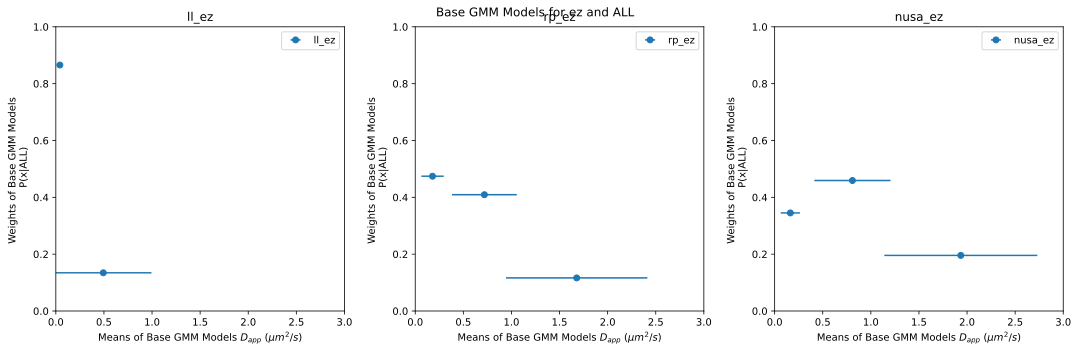

In [38]:
#use the base gmm model to be of ez and ALL for each dataset
#for ll use the 2 component model
#for rp use the 3 component model
#for nusa use the 3 component model
gmm_ll_ez_ALL_base = gmm_ll_ez_ALL[1][3]
gmm_rp_ez_ALL_base = gmm_rp_ez_ALL[2][3]
gmm_nusa_ez_ALL_base = gmm_nusa_ez_ALL[2][3]
#find the means of the base models, cast it into a 1D array
gmm_ll_ez_ALL_base_means = gmm_ll_ez_ALL_base.means_.reshape(-1)
gmm_rp_ez_ALL_base_means = gmm_rp_ez_ALL_base.means_.reshape(-1)
gmm_nusa_ez_ALL_base_means = gmm_nusa_ez_ALL_base.means_.reshape(-1)
#find the std of the base models, use the diagonal of the covariance matrix
gmm_ll_ez_ALL_base_std = np.sqrt(gmm_ll_ez_ALL_base.covariances_[:,0,0])
gmm_rp_ez_ALL_base_std = np.sqrt(gmm_rp_ez_ALL_base.covariances_[:,0,0])
gmm_nusa_ez_ALL_base_std = np.sqrt(gmm_nusa_ez_ALL_base.covariances_[:,0,0])

#find the weights of the base models
gmm_ll_ez_ALL_base_weights = gmm_ll_ez_ALL_base.weights_
gmm_rp_ez_ALL_base_weights = gmm_rp_ez_ALL_base.weights_
gmm_nusa_ez_ALL_base_weights = gmm_nusa_ez_ALL_base.weights_

#plot the base models as a scatter plot on a y-x plot with y = weight and x = mean with error bars of std on the x axis
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(gmm_ll_ez_ALL_base_means,gmm_ll_ez_ALL_base_weights,xerr=gmm_ll_ez_ALL_base_std,fmt="o",label="ll_ez")
ax[0].set_title("ll_ez")
ax[1].errorbar(gmm_rp_ez_ALL_base_means,gmm_rp_ez_ALL_base_weights,xerr=gmm_rp_ez_ALL_base_std,fmt="o",label="rp_ez")
ax[1].set_title("rp_ez")
ax[2].errorbar(gmm_nusa_ez_ALL_base_means,gmm_nusa_ez_ALL_base_weights,xerr=gmm_nusa_ez_ALL_base_std,fmt="o",label="nusa_ez")
ax[2].set_title("nusa_ez")
for i in range(3):
    ax[i].set_xlabel("Means of Base GMM Models" + r" $D_{app}$ ($\mu m^2/s$)")
    ax[i].set_ylabel("Weights of Base GMM Models \n P(x|ALL)")
    ax[i].legend()
plt.tight_layout()
fig.suptitle("Base GMM Models for ez and ALL")
#put the xlim to be the same for all plots 0-1
for i in range(3):
    ax[i].set_xlim(0,3)
    ax[i].set_ylim(0,1)

plt.show()



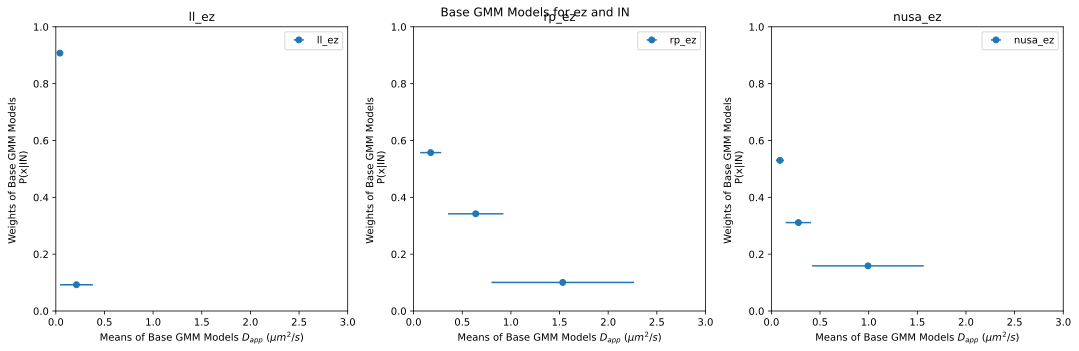

In [47]:
#repeat the above but for IN for all datasets 
gmm_ll_ez_IN_base = gmm_ll_ez_IN[1][3]  
gmm_rp_ez_IN_base = gmm_rp_ez_IN[2][3]
gmm_nusa_ez_IN_base = gmm_nusa_ez_IN[2][3]
#find the means of the base models, cast it into a 1D array
gmm_ll_ez_IN_base_means = gmm_ll_ez_IN_base.means_.reshape(-1)
gmm_rp_ez_IN_base_means = gmm_rp_ez_IN_base.means_.reshape(-1)
gmm_nusa_ez_IN_base_means = gmm_nusa_ez_IN_base.means_.reshape(-1)
#find the std of the base models, use the diagonal of the covariance matrix
gmm_ll_ez_IN_base_std = np.sqrt(gmm_ll_ez_IN_base.covariances_[:,0,0])
gmm_rp_ez_IN_base_std = np.sqrt(gmm_rp_ez_IN_base.covariances_[:,0,0])
gmm_nusa_ez_IN_base_std = np.sqrt(gmm_nusa_ez_IN_base.covariances_[:,0,0])

#find the weights of the base models
gmm_ll_ez_IN_base_weights = gmm_ll_ez_IN_base.weights_
gmm_rp_ez_IN_base_weights = gmm_rp_ez_IN_base.weights_
gmm_nusa_ez_IN_base_weights = gmm_nusa_ez_IN_base.weights_

#plot the base models as a scatter plot on a y-x plot with y = weight and x = mean with error bars of std on the x axis
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].errorbar(gmm_ll_ez_IN_base_means,gmm_ll_ez_IN_base_weights,xerr=gmm_ll_ez_IN_base_std,fmt="o",label="ll_ez")
ax[0].set_title("ll_ez")
ax[1].errorbar(gmm_rp_ez_IN_base_means,gmm_rp_ez_IN_base_weights,xerr=gmm_rp_ez_IN_base_std,fmt="o",label="rp_ez")
ax[1].set_title("rp_ez")
ax[2].errorbar(gmm_nusa_ez_IN_base_means,gmm_nusa_ez_IN_base_weights,xerr=gmm_nusa_ez_IN_base_std,fmt="o",label="nusa_ez")
ax[2].set_title("nusa_ez")
for i in range(3):
    ax[i].set_xlabel("Means of Base GMM Models" + r" $D_{app}$ ($\mu m^2/s$)")
    ax[i].set_ylabel("Weights of Base GMM Models \n P(x|IN)")
    ax[i].legend()
plt.tight_layout()
fig.suptitle("Base GMM Models for ez and IN")
#put the xlim to be the same for all plots 0-1
for i in range(3):
    ax[i].set_xlim(0,3)
    ax[i].set_ylim(0,1)
plt.show()




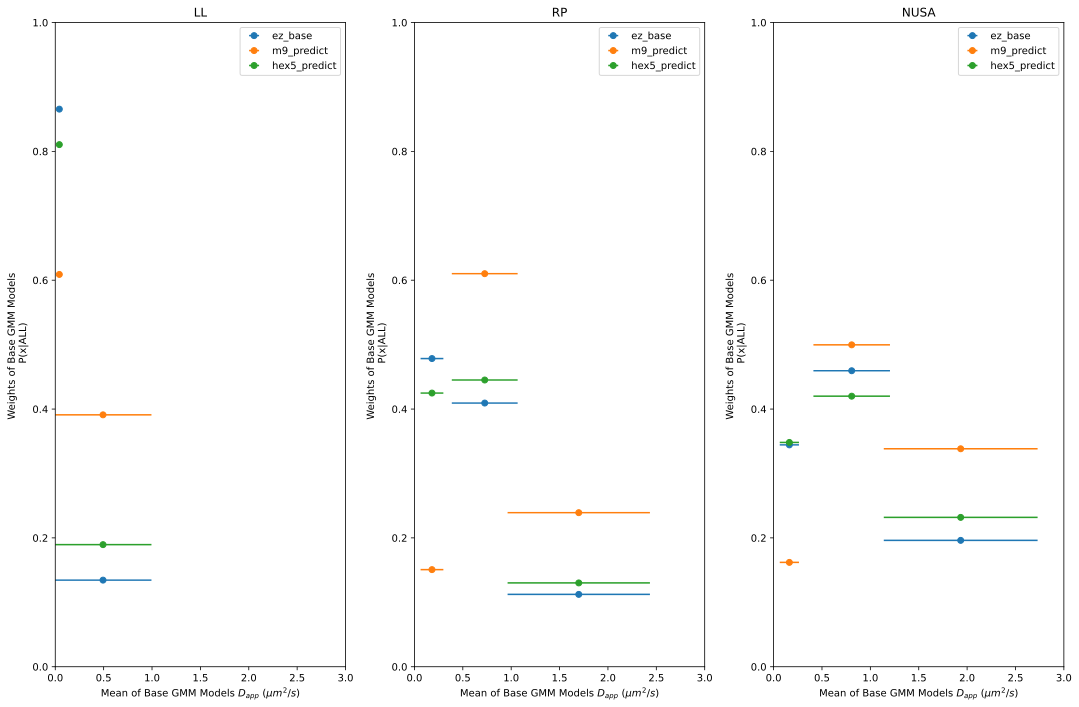

[0.04185136 0.4935262 ]
[0.18127193 0.72649554 1.69839472]
[0.80715758 0.16288555 1.93367144]


In [34]:
#use the base gmm model to predict the m9 and hex5 datasets weights 

#predict the weights of the m9 and hex5 datasets using the base gmm model
gmm_ll_m9_ALL_weights = gmm_ll_ez_ALL_base.predict(con_pix_si(test_batch_MSD_ll_m9_ALL["ALL"]/1.,which="msd").reshape(-1,1))
gmm_rp_m9_ALL_weights = gmm_rp_ez_ALL_base.predict(con_pix_si(test_batch_MSD_rp_m9_ALL["ALL"]/1.,which="msd").reshape(-1,1))
gmm_nusa_m9_ALL_weights = gmm_nusa_ez_ALL_base.predict(con_pix_si(test_batch_MSD_nusa_m9_ALL["ALL"]/1.,which="msd").reshape(-1,1))
#find the percent of datapoints in each component
gmm_ll_m9_ALL_weights_percent = np.array([np.sum(gmm_ll_m9_ALL_weights==i)/len(gmm_ll_m9_ALL_weights) for i in range(len(gmm_ll_ez_ALL_base_weights))])
gmm_rp_m9_ALL_weights_percent = np.array([np.sum(gmm_rp_m9_ALL_weights==i)/len(gmm_rp_m9_ALL_weights) for i in range(len(gmm_rp_ez_ALL_base_weights))])
gmm_nusa_m9_ALL_weights_percent = np.array([np.sum(gmm_nusa_m9_ALL_weights==i)/len(gmm_nusa_m9_ALL_weights) for i in range(len(gmm_nusa_ez_ALL_base_weights))])


gmm_ll_hex5_ALL_weights = gmm_ll_ez_ALL_base.predict(con_pix_si(test_batch_MSD_ll_hex5_ALL["ALL"]/1.,which="msd").reshape(-1,1))
gmm_rp_hex5_ALL_weights = gmm_rp_ez_ALL_base.predict(con_pix_si(test_batch_MSD_rp_hex5_ALL["ALL"]/1.,which="msd").reshape(-1,1))
gmm_nusa_hex5_ALL_weights = gmm_nusa_ez_ALL_base.predict(con_pix_si(test_batch_MSD_nusa_hex5_ALL["ALL"]/1.,which="msd").reshape(-1,1))
#find the percent of datapoints in each component
gmm_ll_hex5_ALL_weights_percent = np.array([np.sum(gmm_ll_hex5_ALL_weights==i)/len(gmm_ll_hex5_ALL_weights) for i in range(len(gmm_ll_ez_ALL_base_weights))])
gmm_rp_hex5_ALL_weights_percent = np.array([np.sum(gmm_rp_hex5_ALL_weights==i)/len(gmm_rp_hex5_ALL_weights) for i in range(len(gmm_rp_ez_ALL_base_weights))])
gmm_nusa_hex5_ALL_weights_percent = np.array([np.sum(gmm_nusa_hex5_ALL_weights==i)/len(gmm_nusa_hex5_ALL_weights) for i in range(len(gmm_nusa_ez_ALL_base_weights))])


#plot the percent of datapoints in each component for the m9 and hex5 datasets
fig,ax = plt.subplots(1,3,figsize=(15,10))
ax[0].errorbar(gmm_ll_ez_ALL_base_means,gmm_ll_ez_ALL_base_weights,xerr=gmm_ll_ez_ALL_base_std,fmt="o",label="ez_base")
ax[0].errorbar(gmm_ll_ez_ALL_base_means,gmm_ll_m9_ALL_weights_percent,xerr=gmm_ll_ez_ALL_base_std,fmt="o",label="m9_predict")
ax[0].errorbar(gmm_ll_ez_ALL_base_means,gmm_ll_hex5_ALL_weights_percent,xerr=gmm_ll_ez_ALL_base_std,fmt="o",label="hex5_predict")
ax[0].set_title("LL")
ax[0].set_xlabel("Mean of Base GMM Models"+ r" $D_{app}$ ($\mu m^2/s$)")
ax[0].set_ylabel("Weights of Base GMM Models \n P(x|ALL)")
ax[0].legend()

ax[1].errorbar(gmm_rp_ez_ALL_base_means,gmm_rp_ez_ALL_base_weights,xerr=gmm_rp_ez_ALL_base_std,fmt="o",label="ez_base")
ax[1].errorbar(gmm_rp_ez_ALL_base_means,gmm_rp_m9_ALL_weights_percent,xerr=gmm_rp_ez_ALL_base_std,fmt="o",label="m9_predict")
ax[1].errorbar(gmm_rp_ez_ALL_base_means,gmm_rp_hex5_ALL_weights_percent,xerr=gmm_rp_ez_ALL_base_std,fmt="o",label="hex5_predict")
ax[1].set_title("RP")
ax[1].set_xlabel("Mean of Base GMM Models"+ r" $D_{app}$ ($\mu m^2/s$)")
ax[1].set_ylabel("Weights of Base GMM Models \n P(x|ALL)")
ax[1].legend()

ax[2].errorbar(gmm_nusa_ez_ALL_base_means,gmm_nusa_ez_ALL_base_weights,xerr=gmm_nusa_ez_ALL_base_std,fmt="o",label="ez_base")
ax[2].errorbar(gmm_nusa_ez_ALL_base_means,gmm_nusa_m9_ALL_weights_percent,xerr=gmm_nusa_ez_ALL_base_std,fmt="o",label="m9_predict")
ax[2].errorbar(gmm_nusa_ez_ALL_base_means,gmm_nusa_hex5_ALL_weights_percent,xerr=gmm_nusa_ez_ALL_base_std,fmt="o",label="hex5_predict")
ax[2].set_title("NUSA")
ax[2].set_xlabel("Mean of Base GMM Models" + r" $D_{app}$ ($\mu m^2/s$)")
ax[2].set_ylabel("Weights of Base GMM Models \n P(x|ALL)")
ax[2].legend()

plt.tight_layout()
#set xlim to be the same for all plots 0-1
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[2].set_xlim(0,3)
#set the ylim to be the same for all plots 0-1
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
plt.show()

print(gmm_ll_ez_ALL_base_means)
print(gmm_rp_ez_ALL_base_means)
print(gmm_nusa_ez_ALL_base_means)

[0.63823827 0.17568528 1.53290603]
[0.04215156 0.21216516]
[0.08798537 0.99280794 0.27747093]


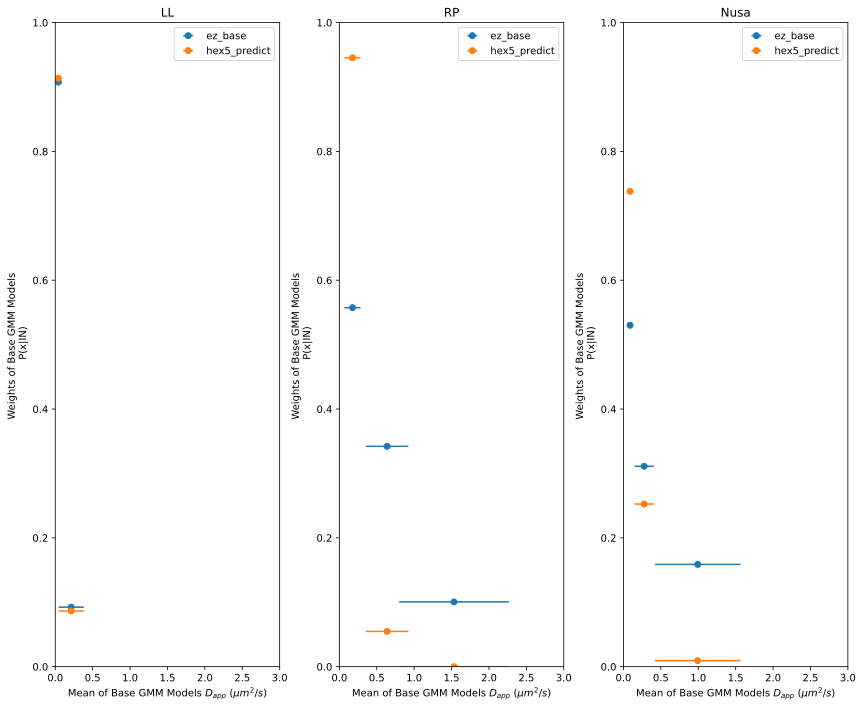

In [48]:
#repeat the above but for IN 
#use the base gmm model to predict the m9 and hex5 datasets weights for IN

#predict the weights of the m9 and hex5 datasets using the base gmm model
gmm_ll_m9_IN_weights = gmm_ll_ez_IN_base.predict(con_pix_si(test_batch_MSD_ll_m9_IN["ALL"]/1.,which="msd").reshape(-1,1))
gmm_rp_m9_IN_weights = gmm_rp_ez_IN_base.predict(con_pix_si(test_batch_MSD_rp_m9_IN["ALL"]/1.,which="msd").reshape(-1,1))
gmm_nusa_m9_IN_weights = gmm_nusa_ez_IN_base.predict(con_pix_si(test_batch_MSD_nusa_m9_IN["ALL"]/1.,which="msd").reshape(-1,1))
#find the percent of datapoints in each component
gmm_ll_m9_IN_weights_percent = np.array([np.sum(gmm_ll_m9_IN_weights==i)/len(gmm_ll_m9_IN_weights) for i in range(len(gmm_ll_ez_IN_base_weights))])
gmm_rp_m9_IN_weights_percent = np.array([np.sum(gmm_rp_m9_IN_weights==i)/len(gmm_rp_m9_IN_weights) for i in range(len(gmm_rp_ez_IN_base_weights))])
gmm_nusa_m9_IN_weights_percent = np.array([np.sum(gmm_nusa_m9_IN_weights==i)/len(gmm_nusa_m9_IN_weights) for i in range(len(gmm_nusa_ez_IN_base_weights))])

gmm_ll_hex5_IN_weights = gmm_ll_ez_IN_base.predict(con_pix_si(test_batch_MSD_ll_hex5_IN["ALL"]/1.,which="msd").reshape(-1,1))
gmm_rp_hex5_IN_weights = gmm_rp_ez_IN_base.predict(con_pix_si(test_batch_MSD_rp_hex5_IN["ALL"]/1.,which="msd").reshape(-1,1))
gmm_nusa_hex5_IN_weights = gmm_nusa_ez_IN_base.predict(con_pix_si(test_batch_MSD_nusa_hex5_IN["ALL"]/1.,which="msd").reshape(-1,1))
#find the percent of datapoints in each component
gmm_ll_hex5_IN_weights_percent = np.array([np.sum(gmm_ll_hex5_IN_weights==i)/len(gmm_ll_hex5_IN_weights) for i in range(len(gmm_ll_ez_IN_base_weights))])
gmm_rp_hex5_IN_weights_percent = np.array([np.sum(gmm_rp_hex5_IN_weights==i)/len(gmm_rp_hex5_IN_weights) for i in range(len(gmm_rp_ez_IN_base_weights))])
gmm_nusa_hex5_IN_weights_percent = np.array([np.sum(gmm_nusa_hex5_IN_weights==i)/len(gmm_nusa_hex5_IN_weights) for i in range(len(gmm_nusa_ez_IN_base_weights))])

#plot the weights of the base gmm model vs the weights of the m9 and hex5 datasets
fig,ax = plt.subplots(1,3,figsize=(12,10))
ax[0].errorbar(gmm_ll_ez_IN_base_means,gmm_ll_ez_IN_base_weights,xerr=gmm_ll_ez_IN_base_std,fmt="o",label="ez_base")
#ax[0].errorbar(gmm_ll_ez_IN_base_means,gmm_ll_m9_IN_weights_percent,xerr=gmm_ll_ez_IN_base_std,fmt="o",label="m9_predict")
ax[0].errorbar(gmm_ll_ez_IN_base_means,gmm_ll_hex5_IN_weights_percent,xerr=gmm_ll_ez_IN_base_std,fmt="o",label="hex5_predict")
ax[0].set_title("LL")
ax[0].set_xlabel("Mean of Base GMM Models"+ r" $D_{app}$ ($\mu m^2/s$)")
ax[0].set_ylabel("Weights of Base GMM Models \n P(x|IN)")
ax[0].legend()
print(gmm_rp_ez_IN_base_means)
print(gmm_ll_ez_IN_base_means)
print(gmm_nusa_ez_IN_base_means)
ax[1].errorbar(gmm_rp_ez_IN_base_means,gmm_rp_ez_IN_base_weights,xerr=gmm_rp_ez_IN_base_std,fmt="o",label="ez_base")
#ax[1].errorbar(gmm_rp_ez_IN_base_means,gmm_rp_m9_IN_weights_percent,xerr=gmm_rp_ez_IN_base_std,fmt="o",label="m9_predict")
ax[1].errorbar(gmm_rp_ez_IN_base_means,gmm_rp_hex5_IN_weights_percent,xerr=gmm_rp_ez_IN_base_std,fmt="o",label="hex5_predict")
ax[1].set_title("RP")
ax[1].set_xlabel("Mean of Base GMM Models"+ r" $D_{app}$ ($\mu m^2/s$)")
ax[1].set_ylabel("Weights of Base GMM Models \n P(x|IN)")
ax[1].legend()

ax[2].errorbar(gmm_nusa_ez_IN_base_means,gmm_nusa_ez_IN_base_weights,xerr=gmm_nusa_ez_IN_base_std,fmt="o",label="ez_base")
#ax[2].errorbar(gmm_nusa_ez_IN_base_means,gmm_nusa_m9_IN_weights_percent,xerr=gmm_nusa_ez_IN_base_std,fmt="o",label="m9_predict")
ax[2].errorbar(gmm_nusa_ez_IN_base_means,gmm_nusa_hex5_IN_weights_percent,xerr=gmm_nusa_ez_IN_base_std,fmt="o",label="hex5_predict")
ax[2].set_title("Nusa")
ax[2].set_xlabel("Mean of Base GMM Models"+ r" $D_{app}$ ($\mu m^2/s$)")
ax[2].set_ylabel("Weights of Base GMM Models \n P(x|IN)")
ax[2].legend()

plt.tight_layout()
#set the x lim to be the same for all plots 0-1
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[2].set_xlim(0,3)
#set the y lim to be the same for all plots 0-1
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

plt.show()

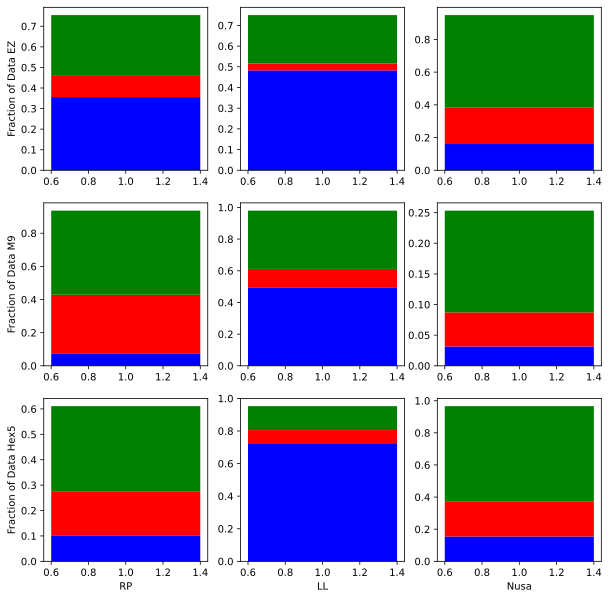

In [136]:
#lets find the fraction of each condition data that is in each component relative to the ALL
#len(IN)/len(ALL), len(OUT)/len(ALL), len(IO)/len(ALL)
#EZ
#for RP
rp_ez_IN_frac = len(test_batch_MSD_rp_ez_IN["ALL"])/len(test_batch_MSD_rp_ez_ALL["ALL"])
rp_ez_OUT_frac = len(test_batch_MSD_rp_ez_OUT["ALL"])/len(test_batch_MSD_rp_ez_ALL["ALL"])
rp_ez_IO_frac = len(test_batch_MSD_rp_ez_IO["ALL"])/len(test_batch_MSD_rp_ez_ALL["ALL"])
#for LL
ll_ez_IN_frac = len(test_batch_MSD_ll_ez_IN["ALL"])/len(test_batch_MSD_ll_ez_ALL["ALL"])
ll_ez_OUT_frac = len(test_batch_MSD_ll_ez_OUT["ALL"])/len(test_batch_MSD_ll_ez_ALL["ALL"])
ll_ez_IO_frac = len(test_batch_MSD_ll_ez_IO["ALL"])/len(test_batch_MSD_ll_ez_ALL["ALL"])
#for Nusa
nusa_ez_IN_frac = len(test_batch_MSD_nusa_ez_IN["ALL"])/len(test_batch_MSD_nusa_ez_ALL["ALL"])
nusa_ez_OUT_frac = len(test_batch_MSD_nusa_ez_OUT["ALL"])/len(test_batch_MSD_nusa_ez_ALL["ALL"])
nusa_ez_IO_frac = len(test_batch_MSD_nusa_ez_IO["ALL"])/len(test_batch_MSD_nusa_ez_ALL["ALL"])

#M9
#for RP
rp_m9_IN_frac = len(test_batch_MSD_rp_m9_IN["ALL"])/len(test_batch_MSD_rp_m9_ALL["ALL"])
rp_m9_OUT_frac = len(test_batch_MSD_rp_m9_OUT["ALL"])/len(test_batch_MSD_rp_m9_ALL["ALL"])
rp_m9_IO_frac = len(test_batch_MSD_rp_m9_IO["ALL"])/len(test_batch_MSD_rp_m9_ALL["ALL"])
#for LL
ll_m9_IN_frac = len(test_batch_MSD_ll_m9_IN["ALL"])/len(test_batch_MSD_ll_m9_ALL["ALL"])
ll_m9_OUT_frac = len(test_batch_MSD_ll_m9_OUT["ALL"])/len(test_batch_MSD_ll_m9_ALL["ALL"])
ll_m9_IO_frac = len(test_batch_MSD_ll_m9_IO["ALL"])/len(test_batch_MSD_ll_m9_ALL["ALL"])
#for Nusa
nusa_m9_IN_frac = len(test_batch_MSD_nusa_m9_IN["ALL"])/len(test_batch_MSD_nusa_m9_ALL["ALL"])
nusa_m9_OUT_frac = len(test_batch_MSD_nusa_m9_OUT["ALL"])/len(test_batch_MSD_nusa_m9_ALL["ALL"])
nusa_m9_IO_frac = len(test_batch_MSD_nusa_m9_IO["ALL"])/len(test_batch_MSD_nusa_m9_ALL["ALL"])

#Hex5
#for RP
rp_hex5_IN_frac = len(test_batch_MSD_rp_hex5_IN["ALL"])/len(test_batch_MSD_rp_hex5_ALL["ALL"])
rp_hex5_OUT_frac = len(test_batch_MSD_rp_hex5_OUT["ALL"])/len(test_batch_MSD_rp_hex5_ALL["ALL"])
rp_hex5_IO_frac = len(test_batch_MSD_rp_hex5_IO["ALL"])/len(test_batch_MSD_rp_hex5_ALL["ALL"])
#for LL
ll_hex5_IN_frac = len(test_batch_MSD_ll_hex5_IN["ALL"])/len(test_batch_MSD_ll_hex5_ALL["ALL"])
ll_hex5_OUT_frac = len(test_batch_MSD_ll_hex5_OUT["ALL"])/len(test_batch_MSD_ll_hex5_ALL["ALL"])
ll_hex5_IO_frac = len(test_batch_MSD_ll_hex5_IO["ALL"])/len(test_batch_MSD_ll_hex5_ALL["ALL"])
#for Nusa
nusa_hex5_IN_frac = len(test_batch_MSD_nusa_hex5_IN["ALL"])/len(test_batch_MSD_nusa_hex5_ALL["ALL"])
nusa_hex5_OUT_frac = len(test_batch_MSD_nusa_hex5_OUT["ALL"])/len(test_batch_MSD_nusa_hex5_ALL["ALL"])
nusa_hex5_IO_frac = len(test_batch_MSD_nusa_hex5_IO["ALL"])/len(test_batch_MSD_nusa_hex5_ALL["ALL"])

#now lets plot the fraction of each condition data that is in each component relative to the ALL
fig = plt.figure(figsize=(10,10))
#create a 3x3 grid of subplots
ax = fig.subplots(3,3)
#plot the fraction of each condition data that is in each component relative to the ALL as a stacked bar plot
#EZ
#for RP
ax[0,0].bar(1,rp_ez_IN_frac, color='blue', label='IN')
ax[0,0].bar(1,rp_ez_IO_frac, bottom=rp_ez_IN_frac, color='red', label='IO')
ax[0,0].bar(1,rp_ez_OUT_frac, bottom=rp_ez_IN_frac+rp_ez_IO_frac, color='green', label='OUT')
#for LL
ax[0,1].bar(1,ll_ez_IN_frac, color='blue', label='IN')
ax[0,1].bar(1,ll_ez_IO_frac, bottom=ll_ez_IN_frac, color='red', label='IO')
ax[0,1].bar(1,ll_ez_OUT_frac, bottom=ll_ez_IN_frac+ll_ez_IO_frac, color='green', label='OUT')
#for Nusa
ax[0,2].bar(1,nusa_ez_IN_frac, color='blue', label='IN')
ax[0,2].bar(1,nusa_ez_IO_frac, bottom=nusa_ez_IN_frac, color='red', label='IO')
ax[0,2].bar(1,nusa_ez_OUT_frac, bottom=nusa_ez_IN_frac+nusa_ez_IO_frac, color='green', label='OUT')
#M9
#for RP
ax[1,0].bar(1,rp_m9_IN_frac, color='blue', label='IN')
ax[1,0].bar(1,rp_m9_IO_frac, bottom=rp_m9_IN_frac, color='red', label='IO')
ax[1,0].bar(1,rp_m9_OUT_frac, bottom=rp_m9_IN_frac+rp_m9_IO_frac, color='green', label='OUT')
#for LL
ax[1,1].bar(1,ll_m9_IN_frac, color='blue', label='IN')
ax[1,1].bar(1,ll_m9_IO_frac, bottom=ll_m9_IN_frac, color='red', label='IO')
ax[1,1].bar(1,ll_m9_OUT_frac, bottom=ll_m9_IN_frac+ll_m9_IO_frac, color='green', label='OUT')
#for Nusa
ax[1,2].bar(1,nusa_m9_IN_frac, color='blue', label='IN')
ax[1,2].bar(1,nusa_m9_IO_frac, bottom=nusa_m9_IN_frac, color='red', label='IO')
ax[1,2].bar(1,nusa_m9_OUT_frac, bottom=nusa_m9_IN_frac+nusa_m9_IO_frac, color='green', label='OUT')
#Hex5
#for RP
ax[2,0].bar(1,rp_hex5_IN_frac, color='blue', label='IN')
ax[2,0].bar(1,rp_hex5_IO_frac, bottom=rp_hex5_IN_frac, color='red', label='IO')
ax[2,0].bar(1,rp_hex5_OUT_frac, bottom=rp_hex5_IN_frac+rp_hex5_IO_frac, color='green', label='OUT')
#for LL
ax[2,1].bar(1,ll_hex5_IN_frac, color='blue', label='IN')
ax[2,1].bar(1,ll_hex5_IO_frac, bottom=ll_hex5_IN_frac, color='red', label='IO')
ax[2,1].bar(1,ll_hex5_OUT_frac, bottom=ll_hex5_IN_frac+ll_hex5_IO_frac, color='green', label='OUT')
#for Nusa
ax[2,2].bar(1,nusa_hex5_IN_frac, color='blue', label='IN')
ax[2,2].bar(1,nusa_hex5_IO_frac, bottom=nusa_hex5_IN_frac, color='red', label='IO')
ax[2,2].bar(1,nusa_hex5_OUT_frac, bottom=nusa_hex5_IN_frac+nusa_hex5_IO_frac, color='green', label='OUT')


#set the x and y labels for only the left and bottom subplots
for i in range(3):
    for j in range(3):
        if i == 2:
            ax[i,0].set_xlabel('RP')
            ax[i,1].set_xlabel('LL')
            ax[i,2].set_xlabel('Nusa')
        if j == 0:
            ax[0,j].set_ylabel('Fraction of Data EZ')
            ax[1,j].set_ylabel('Fraction of Data M9')
            ax[2,j].set_ylabel('Fraction of Data Hex5')
plt.show()